<a href="https://colab.research.google.com/github/dote7ant/Supervised-and-Unsupervised-learning-in-r/blob/master/Week_13_Customer_Characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis to find customer characteritics.

### Introduction.

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.



#### a. Defining the question.

1. Perform clustering stating insights drawn from your analysis and visualizations.
2. Provide comparisons between K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis.

#### b. Defining the metrics of success.

For this project to be successful we should aim to do the following:

1. Clean the data.
2. Find how other variables interact with each other. 
3. Determine which variables are most important to the research question.
4. Group customers.
5. Find group characteristics.

#### c. Understanding the context.

Kira Plastinina  is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines and Armenia.

"Kira Plastinina" shop chain became an object of Russian products boycott in the aftermath of the Russian invasion of Ukraine.

Plastinina was born in Moscow. Her father, Sergei Plastinin, was impressed with his daughter's passion for design and vision of teenage fashion, and suggested that they launch a fashion brand together. In 2007, the first Kira Plastinina store opened in Moscow, Plastinina introduced her first collection and became one of the youngest fashion designers in the world. Since then, the company has opened over 300 stores in Russia and CIS. In 2008, the Company made an unsuccessful attempt to enter the U.S. market. The U.S. entity eventually filed for bankruptcy. 

#### d. Recording the experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. Loading the required libraries.
2. Loading the data set.
3. Check the data.
4. Data preparation.
5. Validate the data.
6. Performing Exploratory Data Analysis (EDA).
7. Solution implementation.
8. Challenging the solution.
9. Draw conclusions.
10. Make recommendations.
11. Follow up questions.


## 1. Loading packages and loading the dataset.

In [10]:
# install tidyverser
install.packages("tidyverse")
require(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [11]:
# install data explorer
# we will use this to add visuals to our checking of data
install.packages('DataExplorer') 
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘data.table’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [12]:
# get package to use for data manipulation
install.packages("dplyr")                            # Install dplyr
library("dplyr")   

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
# install corrplot to plot a correlation visualization
install.packages("corrplot")
require(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: corrplot

corrplot 0.84 loaded



In [14]:
# install fbasics to calculate the skewness and kurtosis of hte data set
install.packages("fBasics")
require(fBasics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries



In [15]:
# install package to encode categorical columns
install.packages("CatEncoders")
require(CatEncoders)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: CatEncoders


Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform




In [16]:
# loading the data set 
url = "http://bit.ly/EcommerceCustomersDataset"
df <- read.csv(url)
# preview the data set 
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


We can observe that most of the columns contain numerical data. There are a total of 18 columns.

## 2. Checking the data.

In [17]:
# find out how many rows and columns are present in the dataframe
dim(df)

[1] 12330    18

We have 18 columns and 12,330 rows in the data set.

In [18]:
# preview the first 5 rows 
head(df, 5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE


In [19]:
# preview the last 5 rows
tail(df, 5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [20]:
# find the column names
print(names(df))

 [1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"                


We will convert the column names to lower case and add an underscore where relevant.

In [21]:
# check the type of dataframe we have 
class(df)

[1] "data.frame"

In [22]:
# check structure of the dataframe
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

As observed earlier we have most of the columns holding numerical values. There are 4 distinct data types that is integer, number, factor and logical data types.

In [23]:
# check if there are any duplicates
anyDuplicated(df)

[1] 159

There are 159 duplicate rows which will need to be removed.

In [24]:
# display the rows that are duplicates
df[duplicated(df),]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE


Most duplicate rows seem to have the tag of a returning visitor. The most common month seems to be March. The months start at November to March but January is not included. The duplicates seem to occur in week days.

In [25]:
# check if there are any missing values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We have missing values in the dataframe.

In [26]:
# display rows with missing values
df[is.na(df),]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1066,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,2,1,Returning_Visitor,FALSE,FALSE
1133,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,1,2,Returning_Visitor,FALSE,FALSE
1134,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,4,5,1,Returning_Visitor,FALSE,FALSE
1135,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE,FALSE
1136,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,3,2,1,1,Returning_Visitor,FALSE,FALSE
1137,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE,FALSE
1474,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,1,Returning_Visitor,TRUE,FALSE
1475,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,6,1,Returning_Visitor,TRUE,FALSE
1476,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,3,1,Returning_Visitor,FALSE,FALSE


The rows have no significant data so they can be removed as they have all columns with null values or half of them with null values.

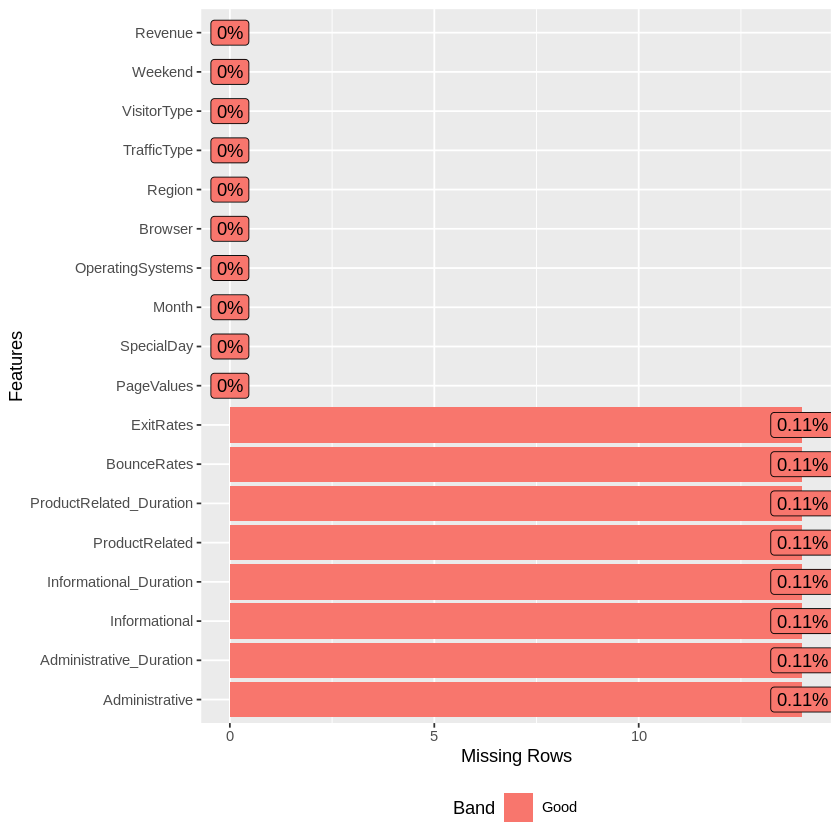

In [27]:
# a visualization to show percentage of missing values in our data set
plot_missing(df)

From the graph we can see that 8 columns have missing values. They will need to be removed.

#### Frequencies

In [28]:
# frequency of weekend
week <- table(df$Weekend)
week


FALSE  TRUE 
 9462  2868 

Most customers shop during the week days 

In [29]:
# frequency of gender
browser <- table(df$Browser)
browser


   1    2    3    4    5    6    7    8    9   10   11   12   13 
2462 7961  105  736  467  174   49  135    1  163    6   10   61 

Most popular browser accessing the site is 2.

In [30]:
# frequency of visitor type
visitor <- table(df$VisitorType)
visitor


      New_Visitor             Other Returning_Visitor 
             1694                85             10551 

Most visitors are returning visitors.

In [31]:
# frequency of traffic type
traffic <- table(df$TrafficType)
traffic


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2451 3913 2052 1069  260  444   40  343   42  450  247    1  738   13   38    3 
  17   18   19   20 
   1   10   17  198 

Most common traffic is type 2.

In [32]:
# frequency of region
region <- table(df$Region)
region


   1    2    3    4    5    6    7    8    9 
4780 1136 2403 1182  318  805  761  434  511 

Region 1 occurs the most.

In [33]:
# frequency of operating system
os <- table(df$OperatingSystems)
os


   1    2    3    4    5    6    7    8 
2585 6601 2555  478    6   19    7   79 

Most visitors are accessing the site using browser type 2.

In [34]:
# frequency of month
month <- table(df$Month)
month


 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1727  184  432  288 1907 3364 2998  549  448 

Most common month is  May.

We will need to plot graphs for the frequencies in order to see the full picture.

## 3. Tidying up the data.

In [35]:
# remove missing values from the dataframe 
df_n <- na.omit(df)

In [36]:
# confirm there are no more missing values
sum(is.na(df_n))

[1] 0

Success!!!

In [37]:
# remove duplicate values from the dataframe
df_n <- df_n[!duplicated(df_n), ]

In [38]:
# check if there are any duplicates
anyDuplicated(df_n)

[1] 0

Success!!!

In [39]:
# change column names to lower case 
colnames(df_n) <- tolower(colnames(df_n))
# check to see if the change is successful
colnames(df_n)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

In [40]:
# rename the columns to appropriate ones
df_n <- rename(df_n, product_related = productrelated, product_related_duration = productrelated_duration,  bounce_rates = bouncerates,
exit_rates = exitrates, page_values = pagevalues, special_day = specialday, operating_systems = operatingsystems, traffic_type = traffictype,
visitor_type = visitortype)

In [41]:
# confirm the names have been converted 
print(names(df_n))

 [1] "administrative"           "administrative_duration" 
 [3] "informational"            "informational_duration"  
 [5] "product_related"          "product_related_duration"
 [7] "bounce_rates"             "exit_rates"              
 [9] "page_values"              "special_day"             
[11] "month"                    "operating_systems"       
[13] "browser"                  "region"                  
[15] "traffic_type"             "visitor_type"            
[17] "weekend"                  "revenue"                 


Success!!!

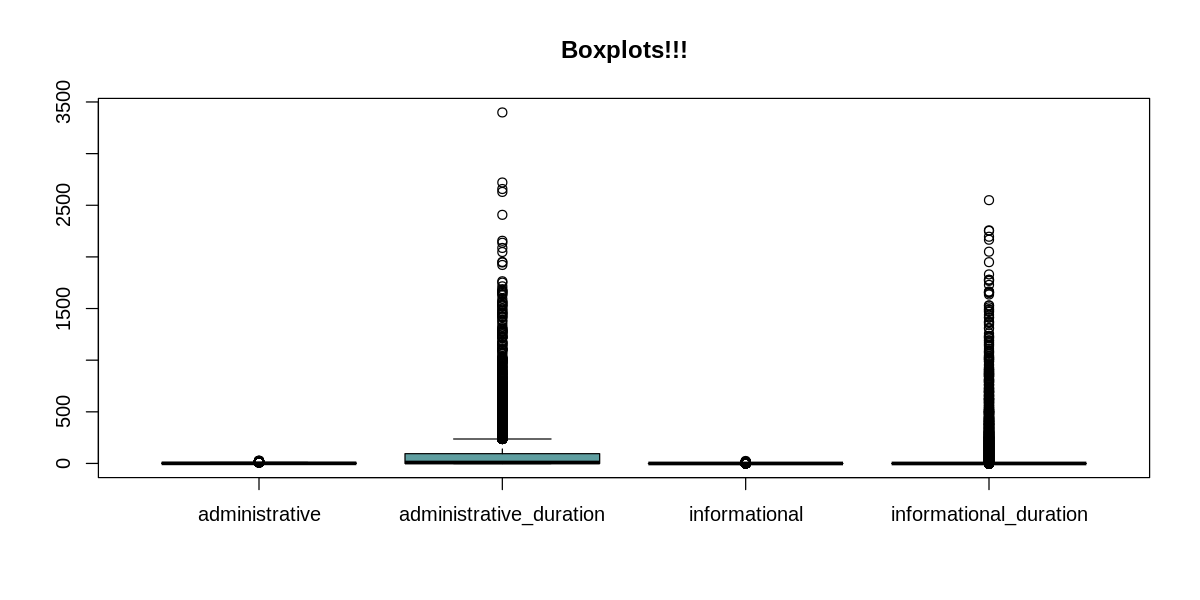

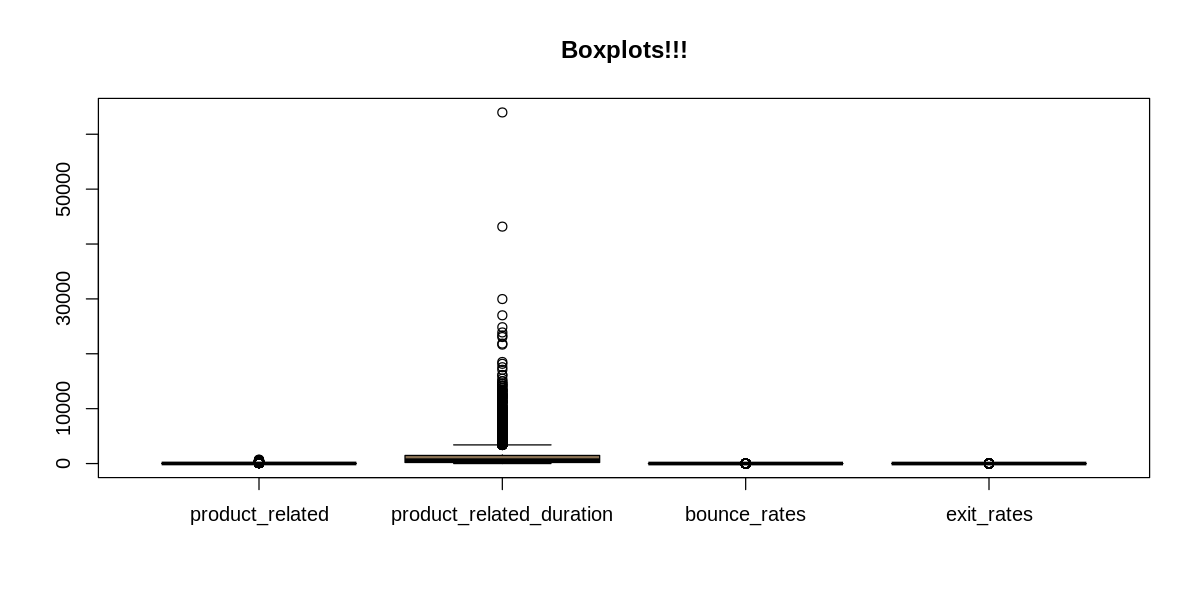

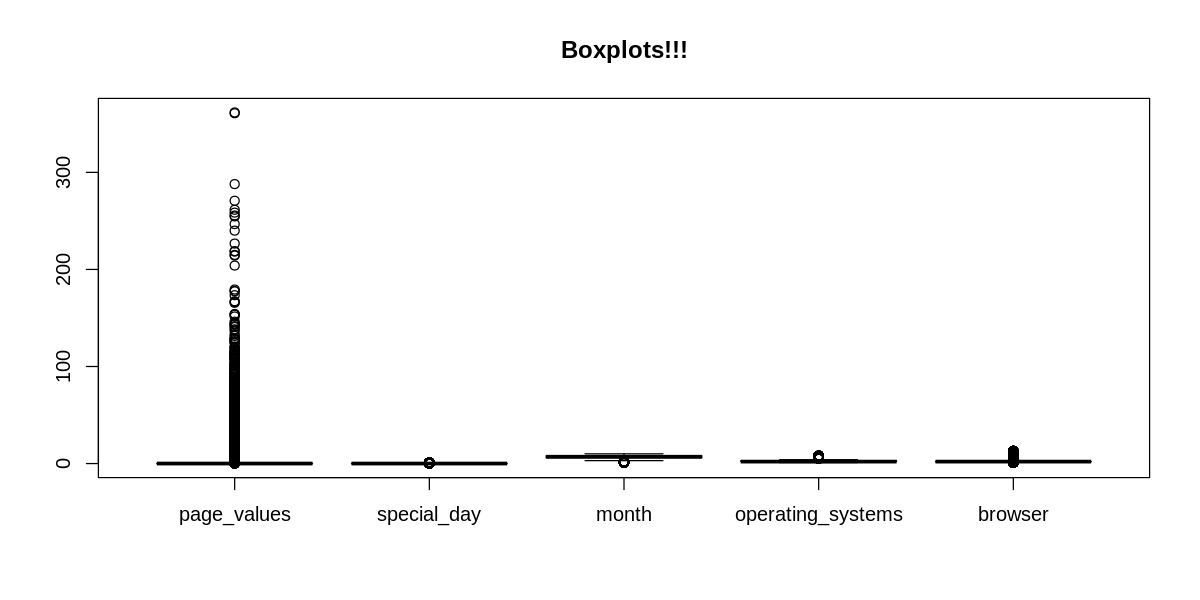

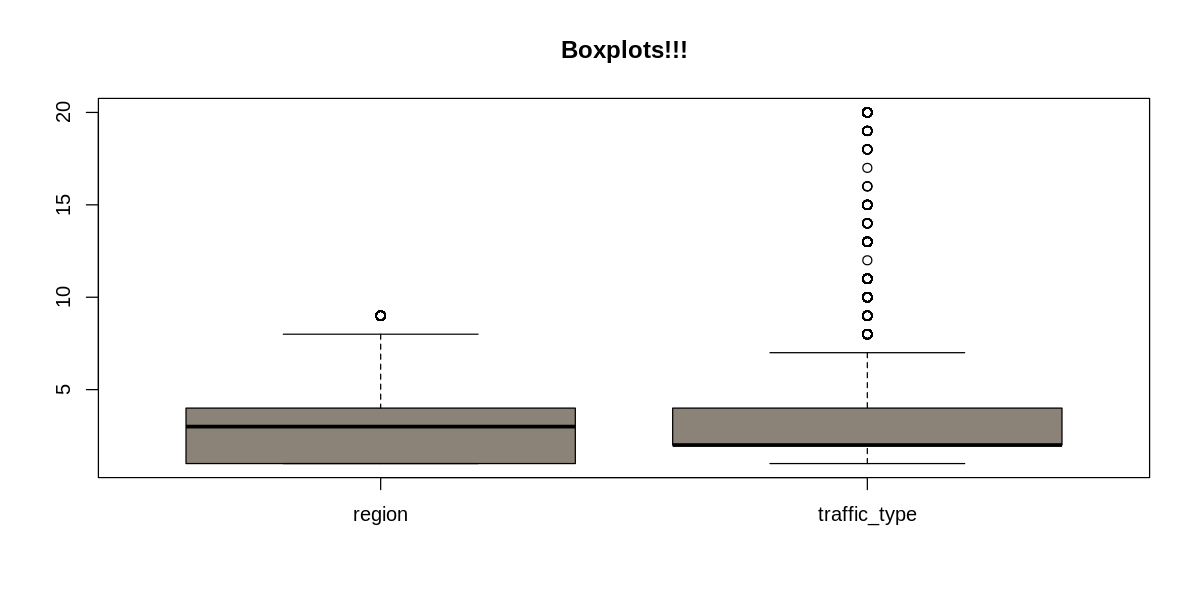

In [42]:
options(repr.plot.width=10, repr.plot.height=5)
boxplot(df_n[, c(1:4)], col="cadetblue",  main = "Boxplots!!!")
boxplot(df_n[, c(5:8)], col="burlywood4",  main = "Boxplots!!!")
boxplot(df_n[, c(9:13)], col="coral4",  main = "Boxplots!!!")
boxplot(df_n[, c(14,15)], col="antiquewhite4",  main = "Boxplots!!!")

There exists outliers in our data set but we will not remove them as we want to have a clear representation of a real world experience where there are customers who spend alot of time on a particular page before moving on, we do notice that some columns are affected by others. 

In [43]:
# check new size of the data frame
dim(df_n)

[1] 12199    18

The size has reduced from 12,330 to 12, 199. This is acceptable to work with.

## 4. Exploratory Data Analysis (EDA).

###i) Univariate Analysis.

In [44]:
# make a copy of df_n
eda <- cbind(df_n)
dim(eda)

[1] 12199    18

In [45]:
# check the data summaries
summary(eda)

 administrative  administrative_duration informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 informational_duration product_related  product_related_duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0         
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6         
 Median :   0.00        Median : 18.00   Median :  609.5         
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5         
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6         
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5         
                                                                 


In [46]:
### Mode is the observation that appears most frequently.
# function to get the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [47]:
# function to calculate the mode for the different columns
number <- c(colnames(eda))
for (i in number ){
  ad_mode <- getmode(eda[, i])
  print("The mode for")
  print(colnames(eda[i]))
  print(ad_mode)
}

[1] "The mode for"
[1] "administrative"
[1] 0
[1] "The mode for"
[1] "administrative_duration"
[1] 0
[1] "The mode for"
[1] "informational"
[1] 0
[1] "The mode for"
[1] "informational_duration"
[1] 0
[1] "The mode for"
[1] "product_related"
[1] 1
[1] "The mode for"
[1] "product_related_duration"
[1] 0
[1] "The mode for"
[1] "bounce_rates"
[1] 0
[1] "The mode for"
[1] "exit_rates"
[1] 0.2
[1] "The mode for"
[1] "page_values"
[1] 0
[1] "The mode for"
[1] "special_day"
[1] 0
[1] "The mode for"
[1] "month"
[1] May
Levels: Aug Dec Feb Jul June Mar May Nov Oct Sep
[1] "The mode for"
[1] "operating_systems"
[1] 2
[1] "The mode for"
[1] "browser"
[1] 2
[1] "The mode for"
[1] "region"
[1] 1
[1] "The mode for"
[1] "traffic_type"
[1] 2
[1] "The mode for"
[1] "visitor_type"
[1] Returning_Visitor
Levels: New_Visitor Other Returning_Visitor
[1] "The mode for"
[1] "weekend"
[1] FALSE
[1] "The mode for"
[1] "revenue"
[1] FALSE


#### Variance 

This is the measure of how far a set of numbers are spread out from their average value.

In [48]:
# using the dplyr package we find the variance of our numerical columns
library(dplyr)
eda %>% summarise_if(is.numeric, var)

administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.09457,31516.25,1.62771,20010.51,1989.241,3686121,0.002061387,0.0021388,348.1132,0.03988432,0.8226229,2.926075,5.771712,16.12675


We observe that all our columns have posive variances. The highest is product related duration. The lowest variance is bounce rates. We will need to standardize our data during modelling as the spread is significant.

#### Standard Deviation 

This is the square root of the variance.


In [49]:
# using the dplyr package we find the standard deviation of our numberical columns.
library(dplyr)
eda %>% summarise_if(is.numeric, sd)

administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.330851,177.5282,1.275817,141.4585,44.60091,1919.927,0.0454025,0.04624716,18.65779,0.1997106,0.9069856,1.710578,2.402439,4.015813


Since standard deviation is the square root of variance we observe the same ranking as that of variance. This is because the standard deviation is a square root of variance hence the same trend. 

#### Skewness and Kurtosis 

In [50]:
# retrieve numerical columns 
data <- select_if(eda, is.numeric)             # Subset numeric columns with dplyr
head(data)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


#####Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [51]:
# find the skewness of the data
library(fBasics)
skewness(data)

administrative  administrative_duration            informational 
                1.946009                 5.589523                 4.012958 
  informational_duration          product_related product_related_duration 
                7.536508                 4.331601                 7.250512 
            bounce_rates               exit_rates              page_values 
                3.152486                 2.232851                 6.347882 
             special_day        operating_systems                  browser 
                3.284077                 2.031705                 3.215257 
                  region             traffic_type 
                0.978610                 1.958281

##### Kurtosis

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

In [52]:
# find the kurtosis of the data 
kurtosis(data)

administrative  administrative_duration            informational 
               4.6348537               50.0851812               26.6376802 
  informational_duration          product_related product_related_duration 
              75.4512246               31.0434452              136.5679069 
            bounce_rates               exit_rates              page_values 
               9.2530550                4.6230025               64.9291691 
             special_day        operating_systems                  browser 
               9.7839577               10.2666928               12.5340432 
                  region             traffic_type 
              -0.1602703                3.4650674

### Univariate graphs

#### 1. Histogram plots

In [53]:
# install the grid extra package
library(grid)
install.packages("gridExtra")
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(fac_cols)` instead of `fac_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



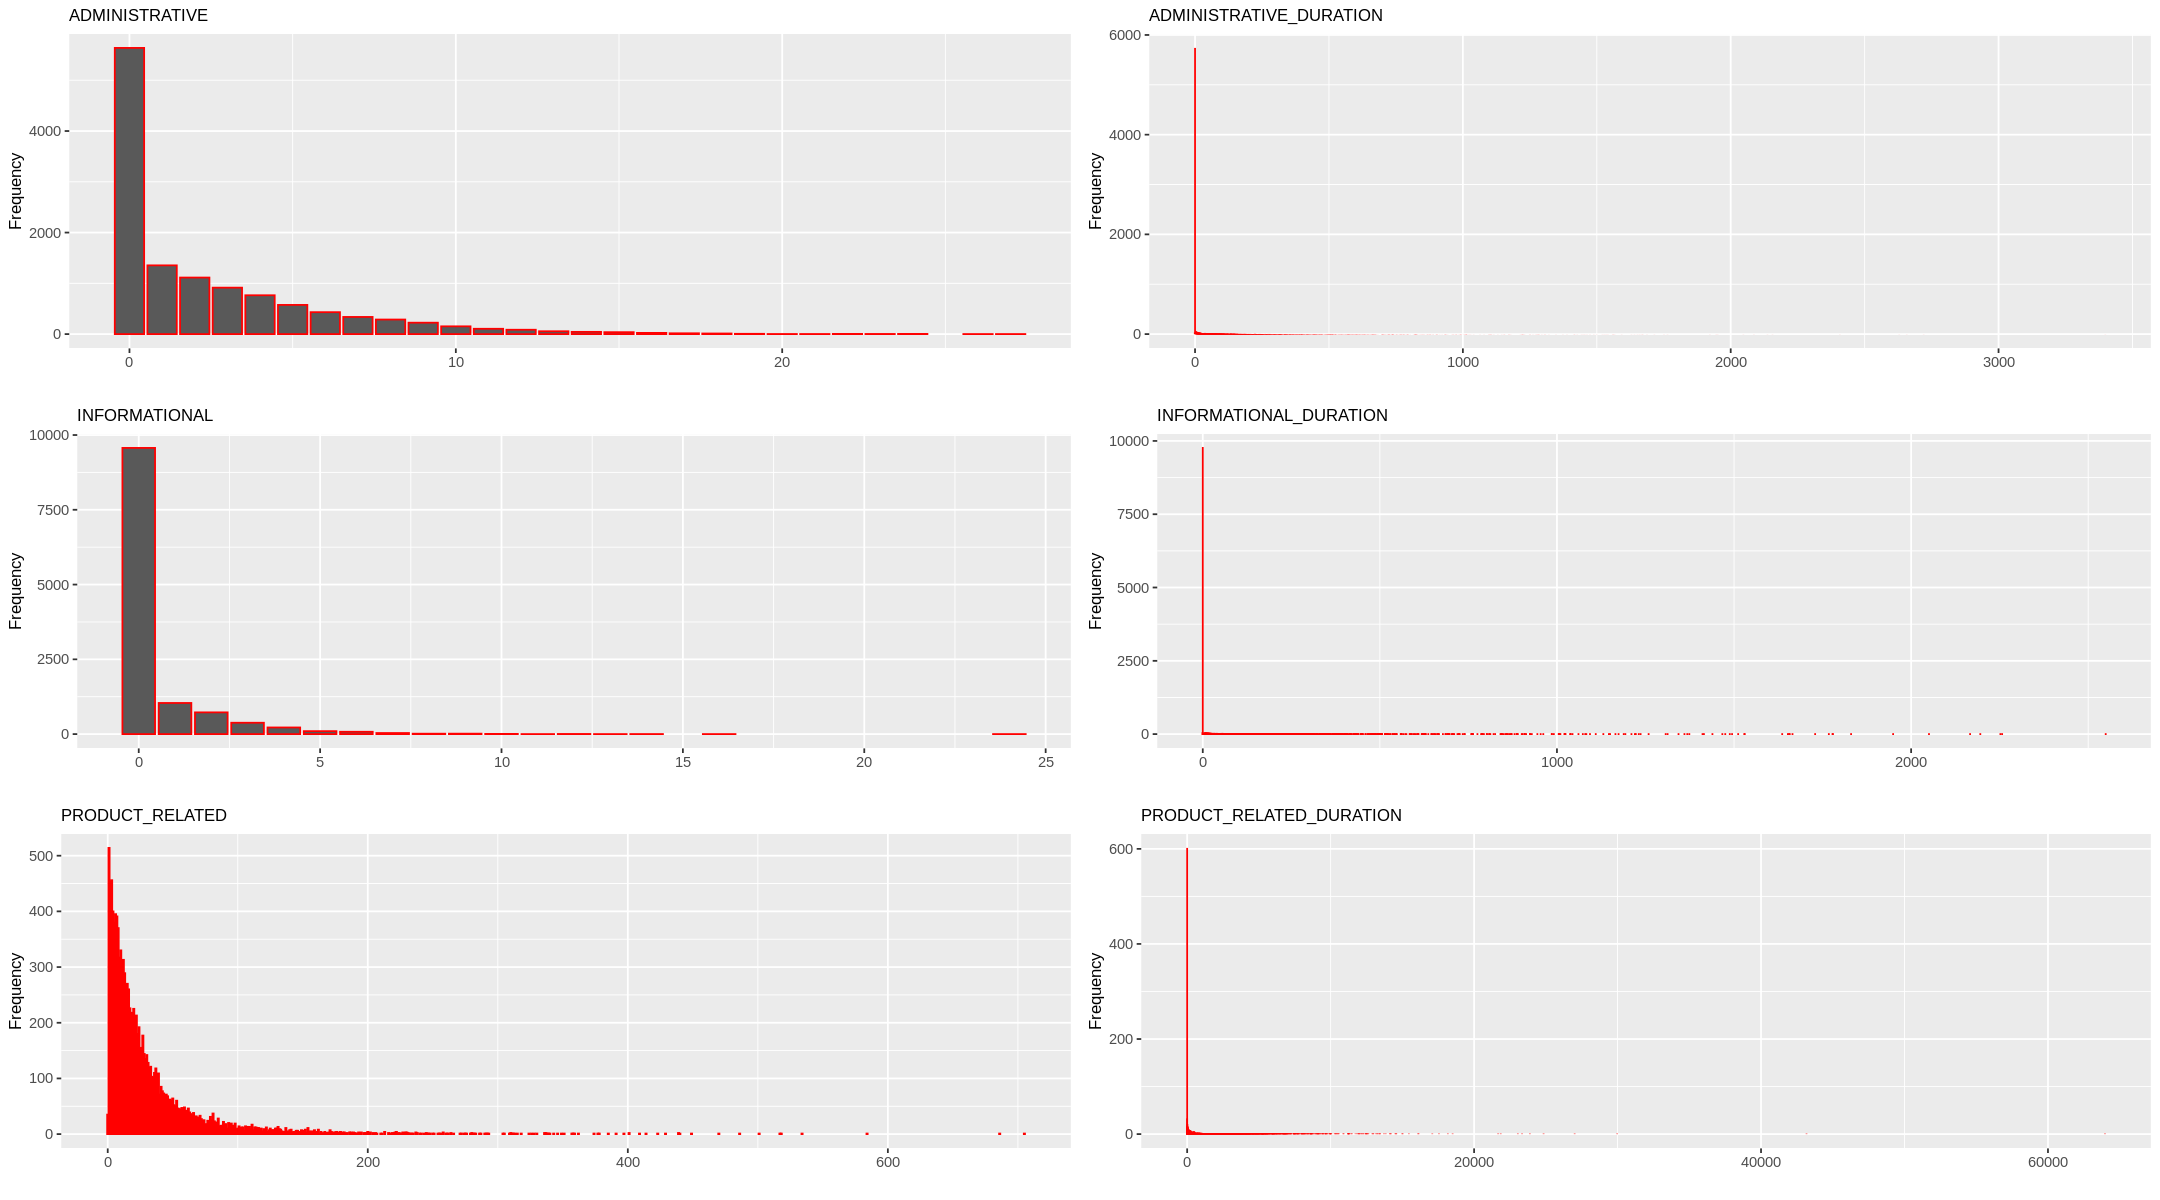

In [54]:
# Plotting histograms
fac_cols = c('administrative', 'administrative_duration',	'informational',	'informational_duration', 'product_related', 'product_related_duration')

columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

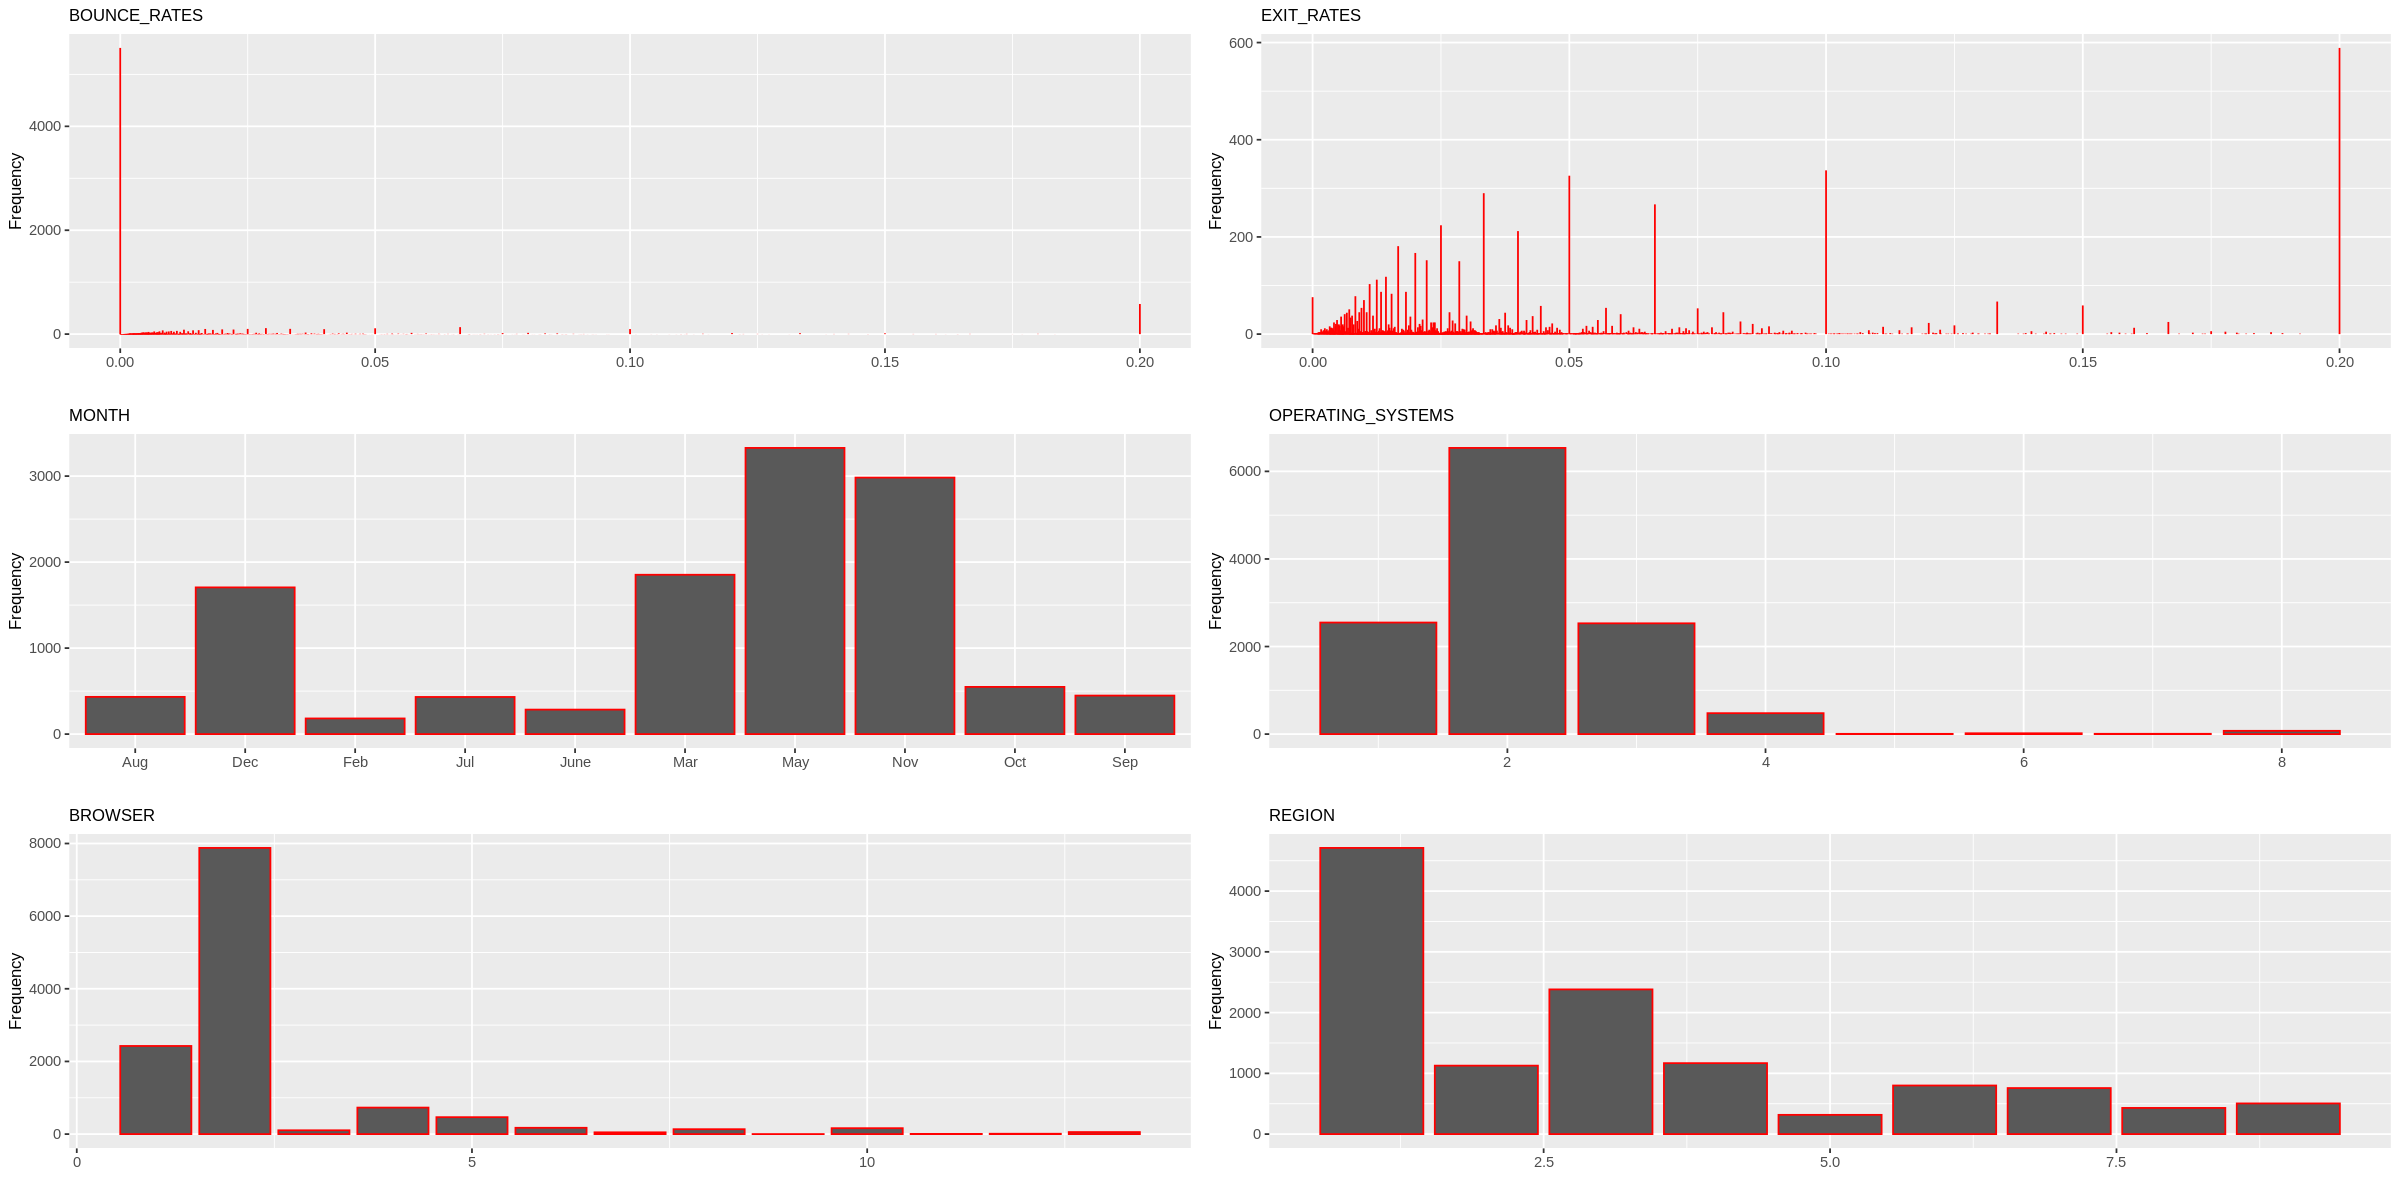

In [55]:
# Plotting histograms
fac_cols = c('bounce_rates', 'exit_rates', 'month', 'operating_systems', 'browser', 'region')

columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 20, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

In [56]:
names(eda)

[1] "administrative"           "administrative_duration" 
 [3] "informational"            "informational_duration"  
 [5] "product_related"          "product_related_duration"
 [7] "bounce_rates"             "exit_rates"              
 [9] "page_values"              "special_day"             
[11] "month"                    "operating_systems"       
[13] "browser"                  "region"                  
[15] "traffic_type"             "visitor_type"            
[17] "weekend"                  "revenue"

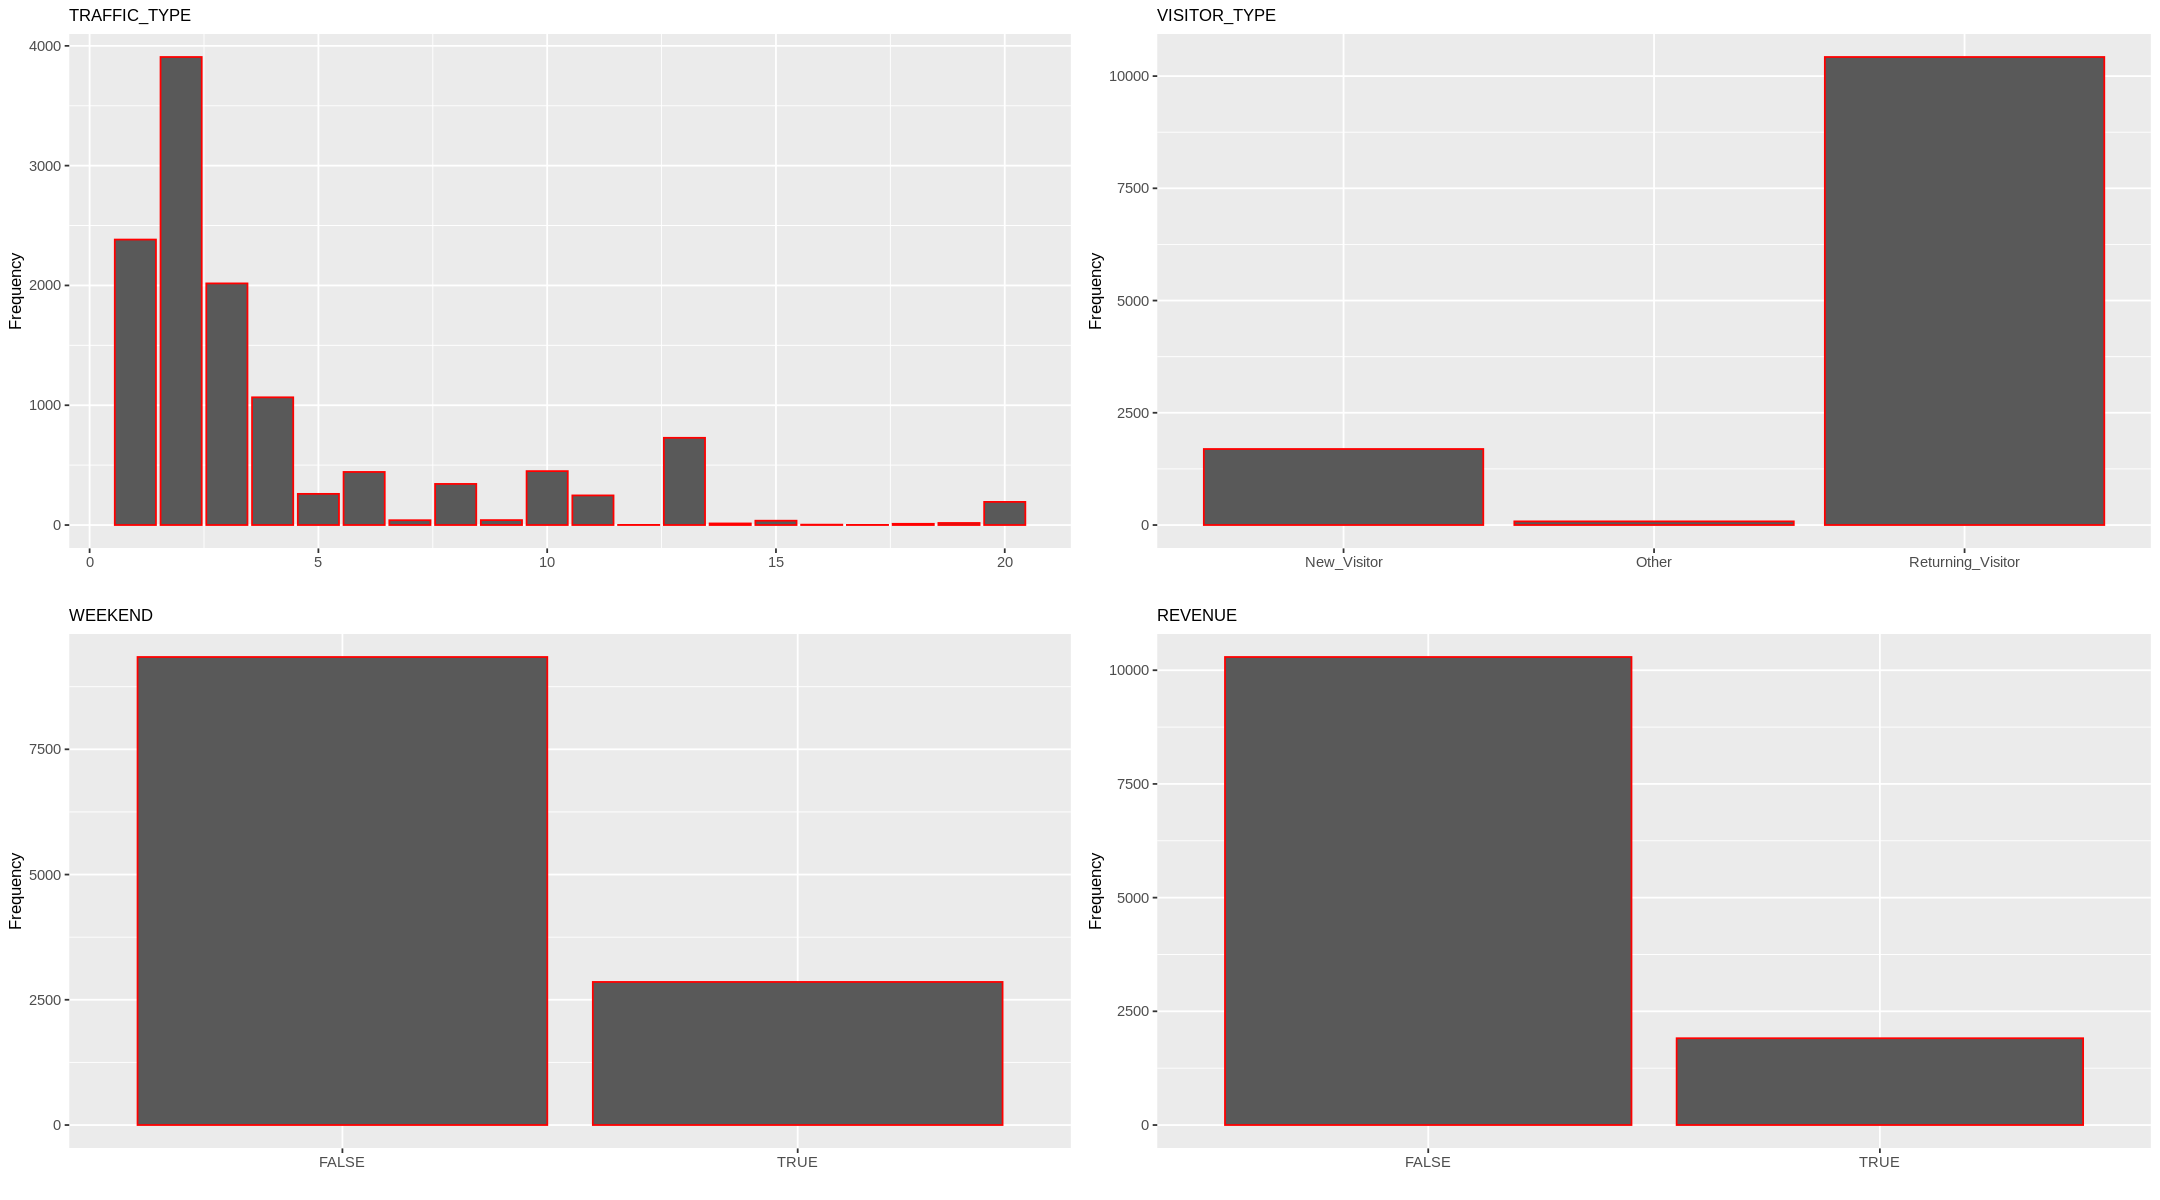

In [57]:
# Plotting histograms
fac_cols = c('traffic_type', 'visitor_type', 'weekend', 'revenue')

columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:4){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

#### 2. Line plots

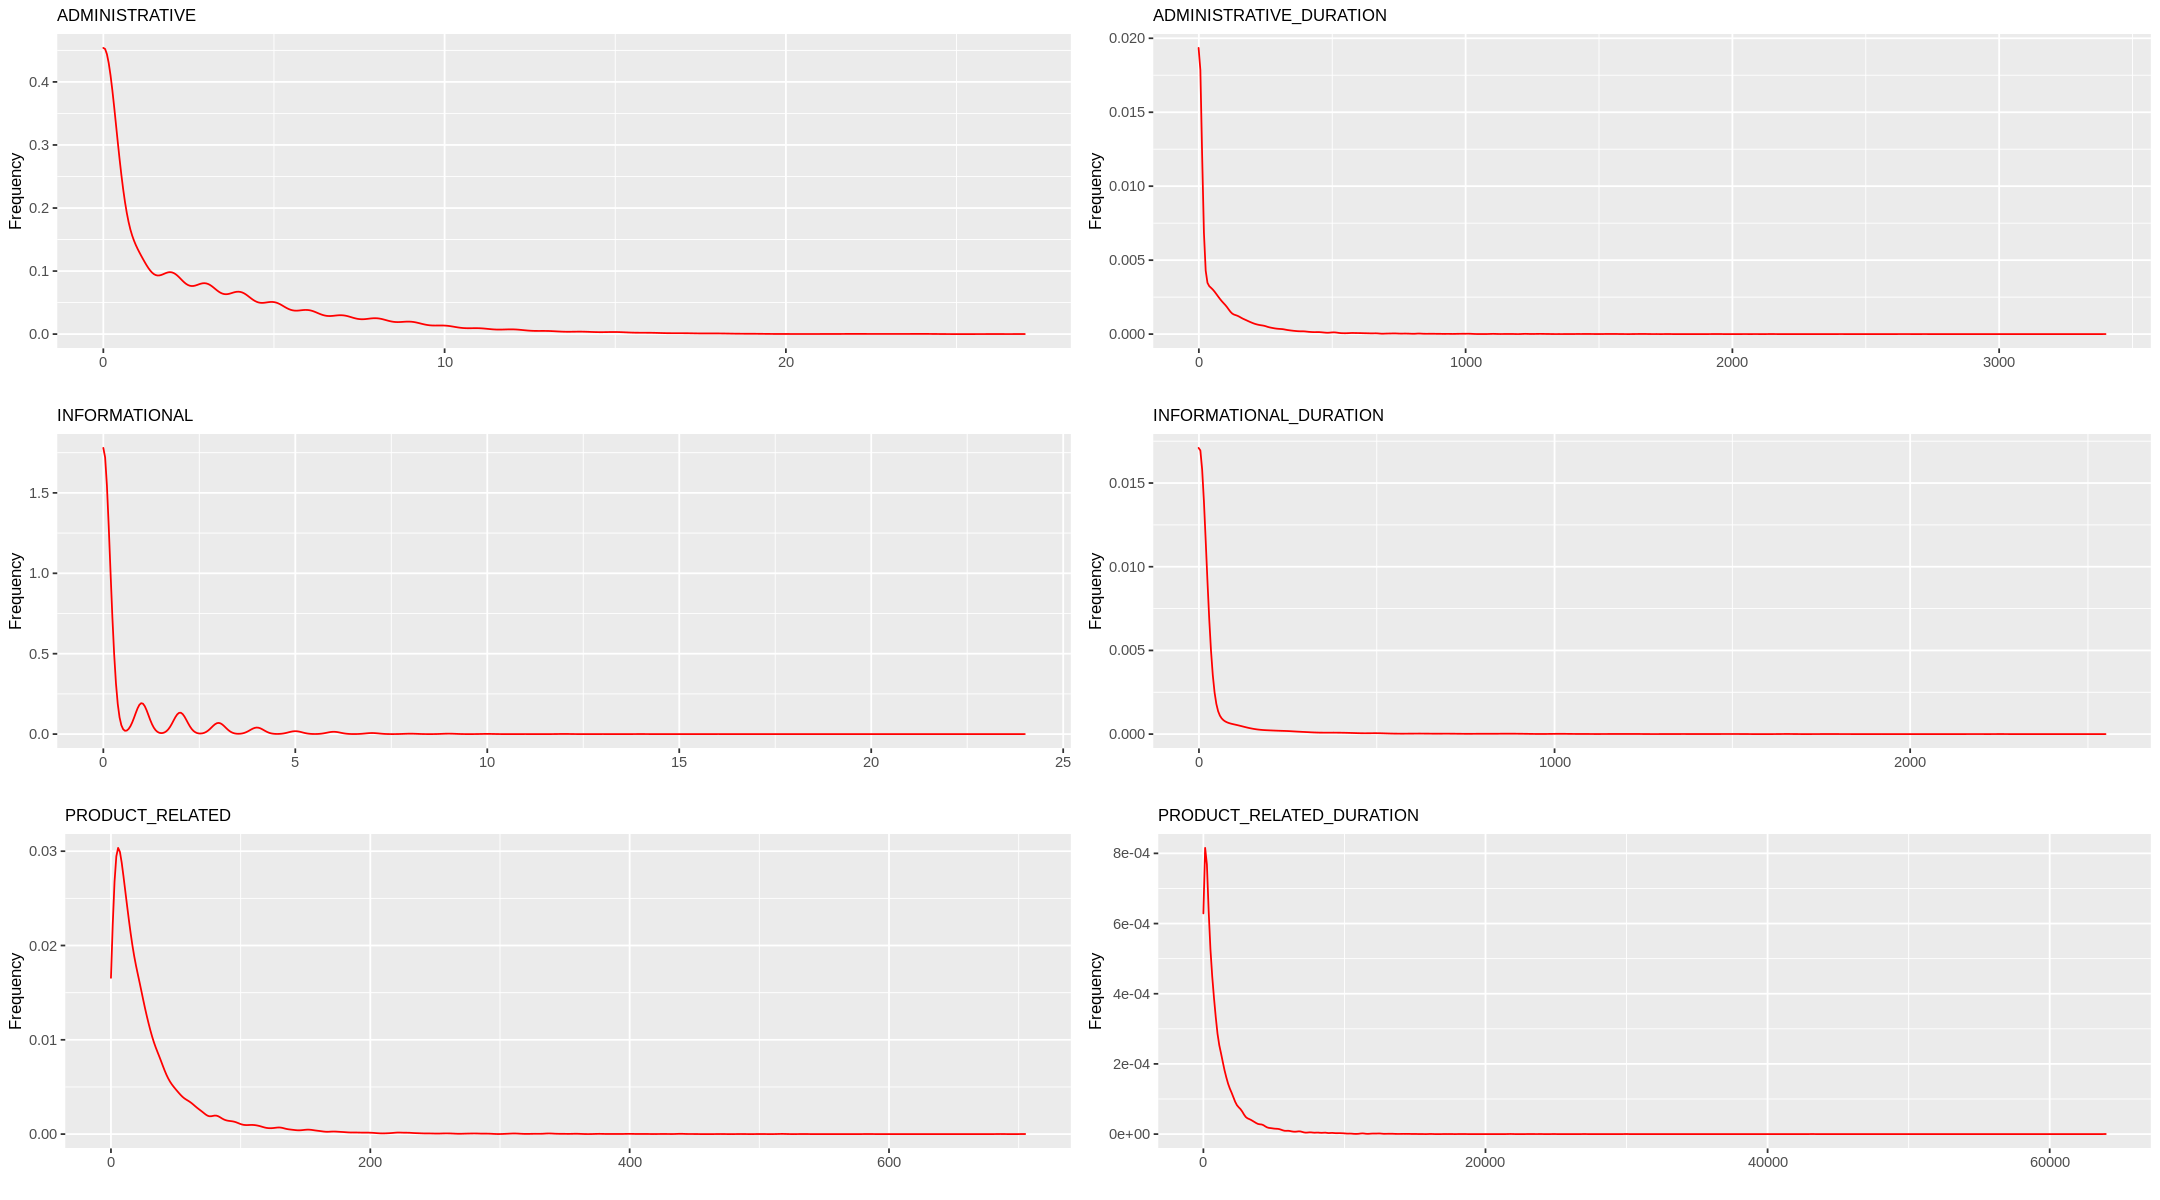

In [58]:
# Plotting line plots
fac_cols = c('administrative', 'administrative_duration',	'informational',	'informational_duration', 'product_related', 'product_related_duration')

columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_density(color ='red' ) + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

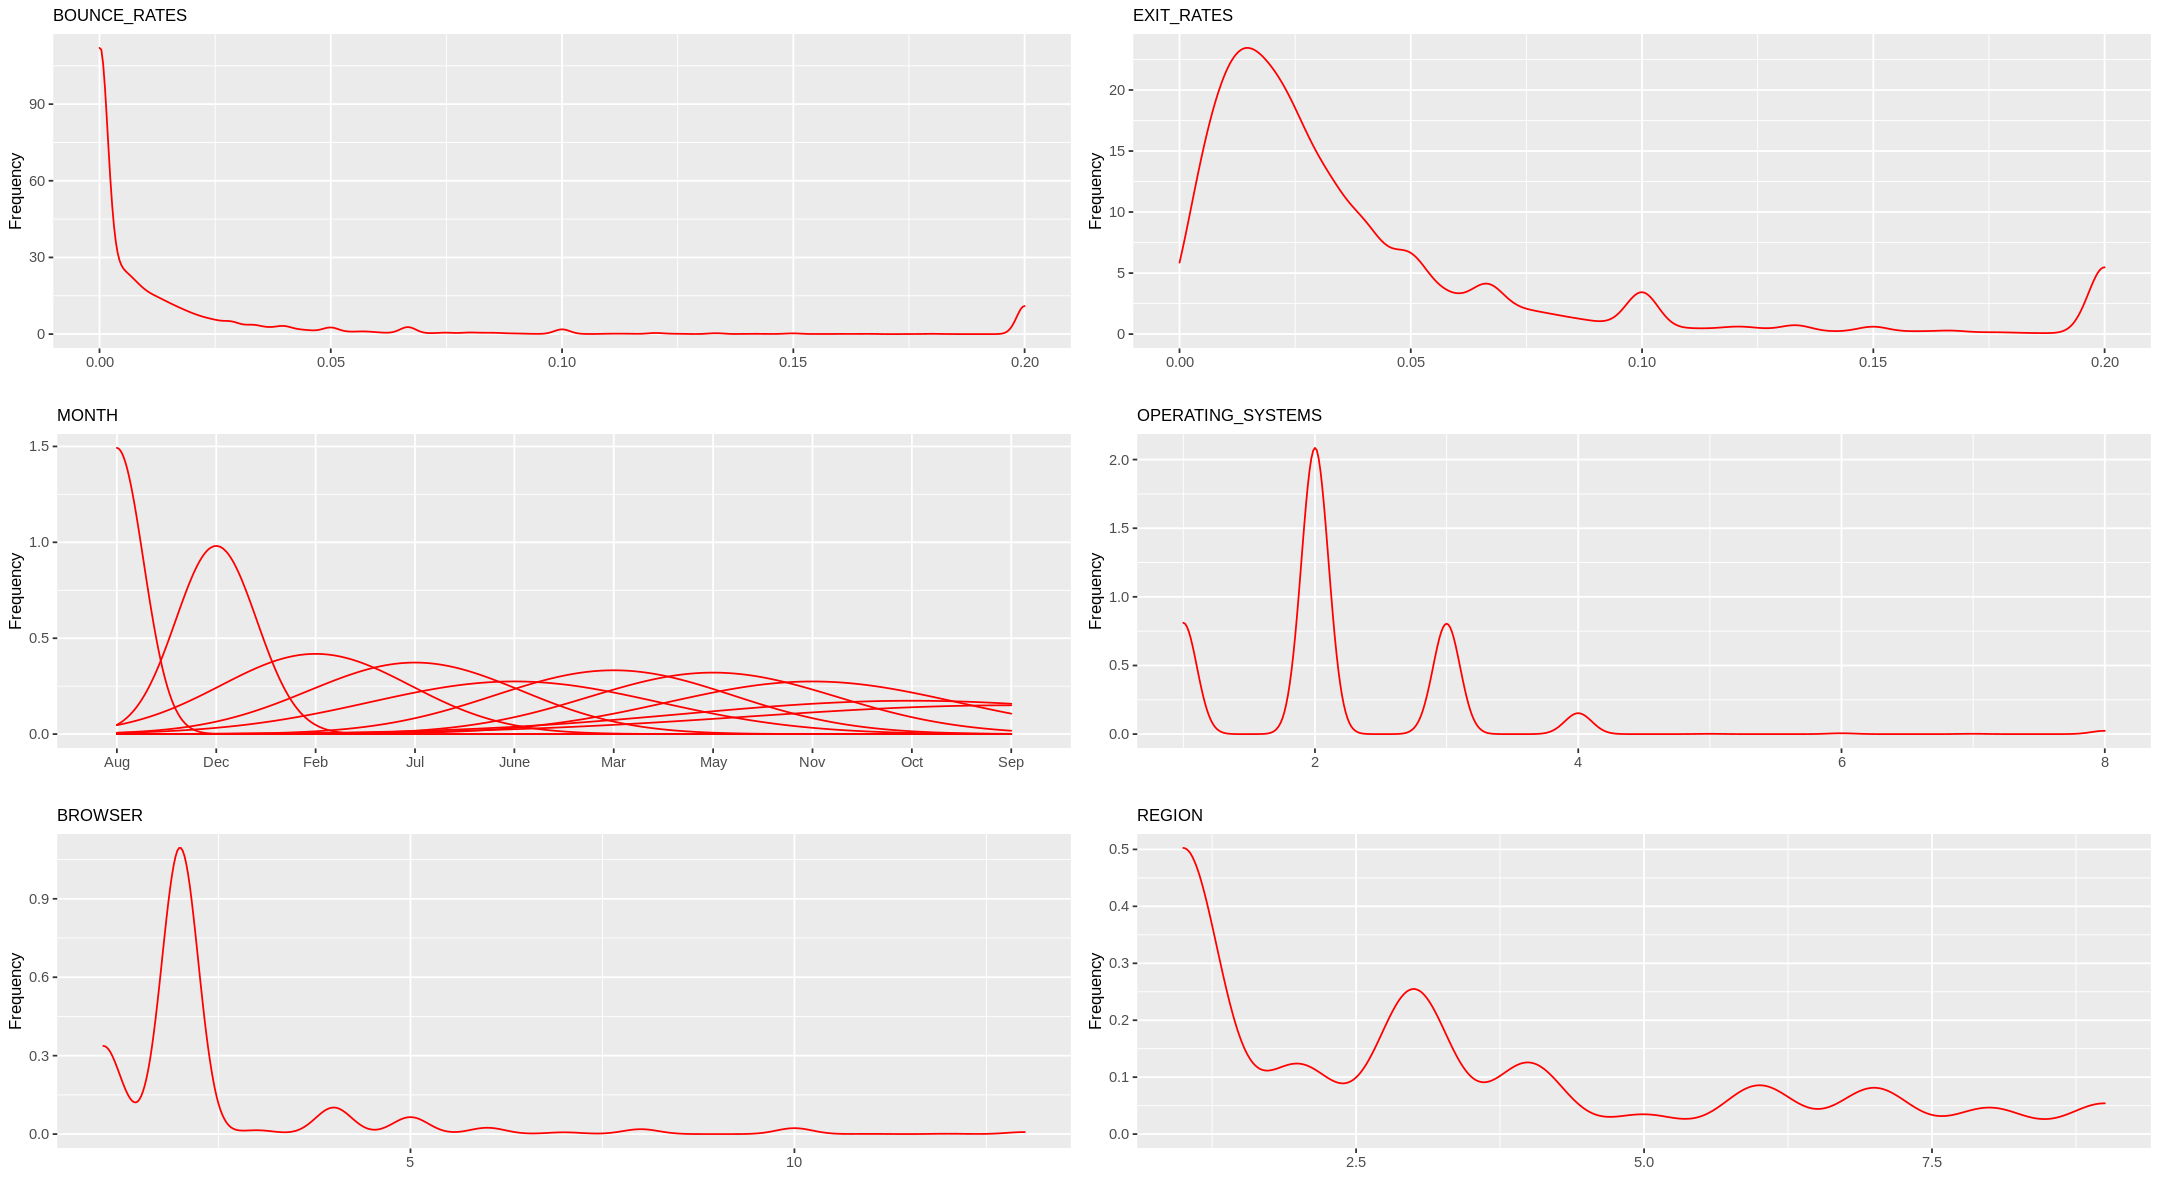

In [59]:
# plotting line plots
fac_cols = c('bounce_rates', 'exit_rates', 'month', 'operating_systems', 'browser', 'region')

columns = colnames(select(eda, fac_cols))
p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_density(color ='red' ) + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

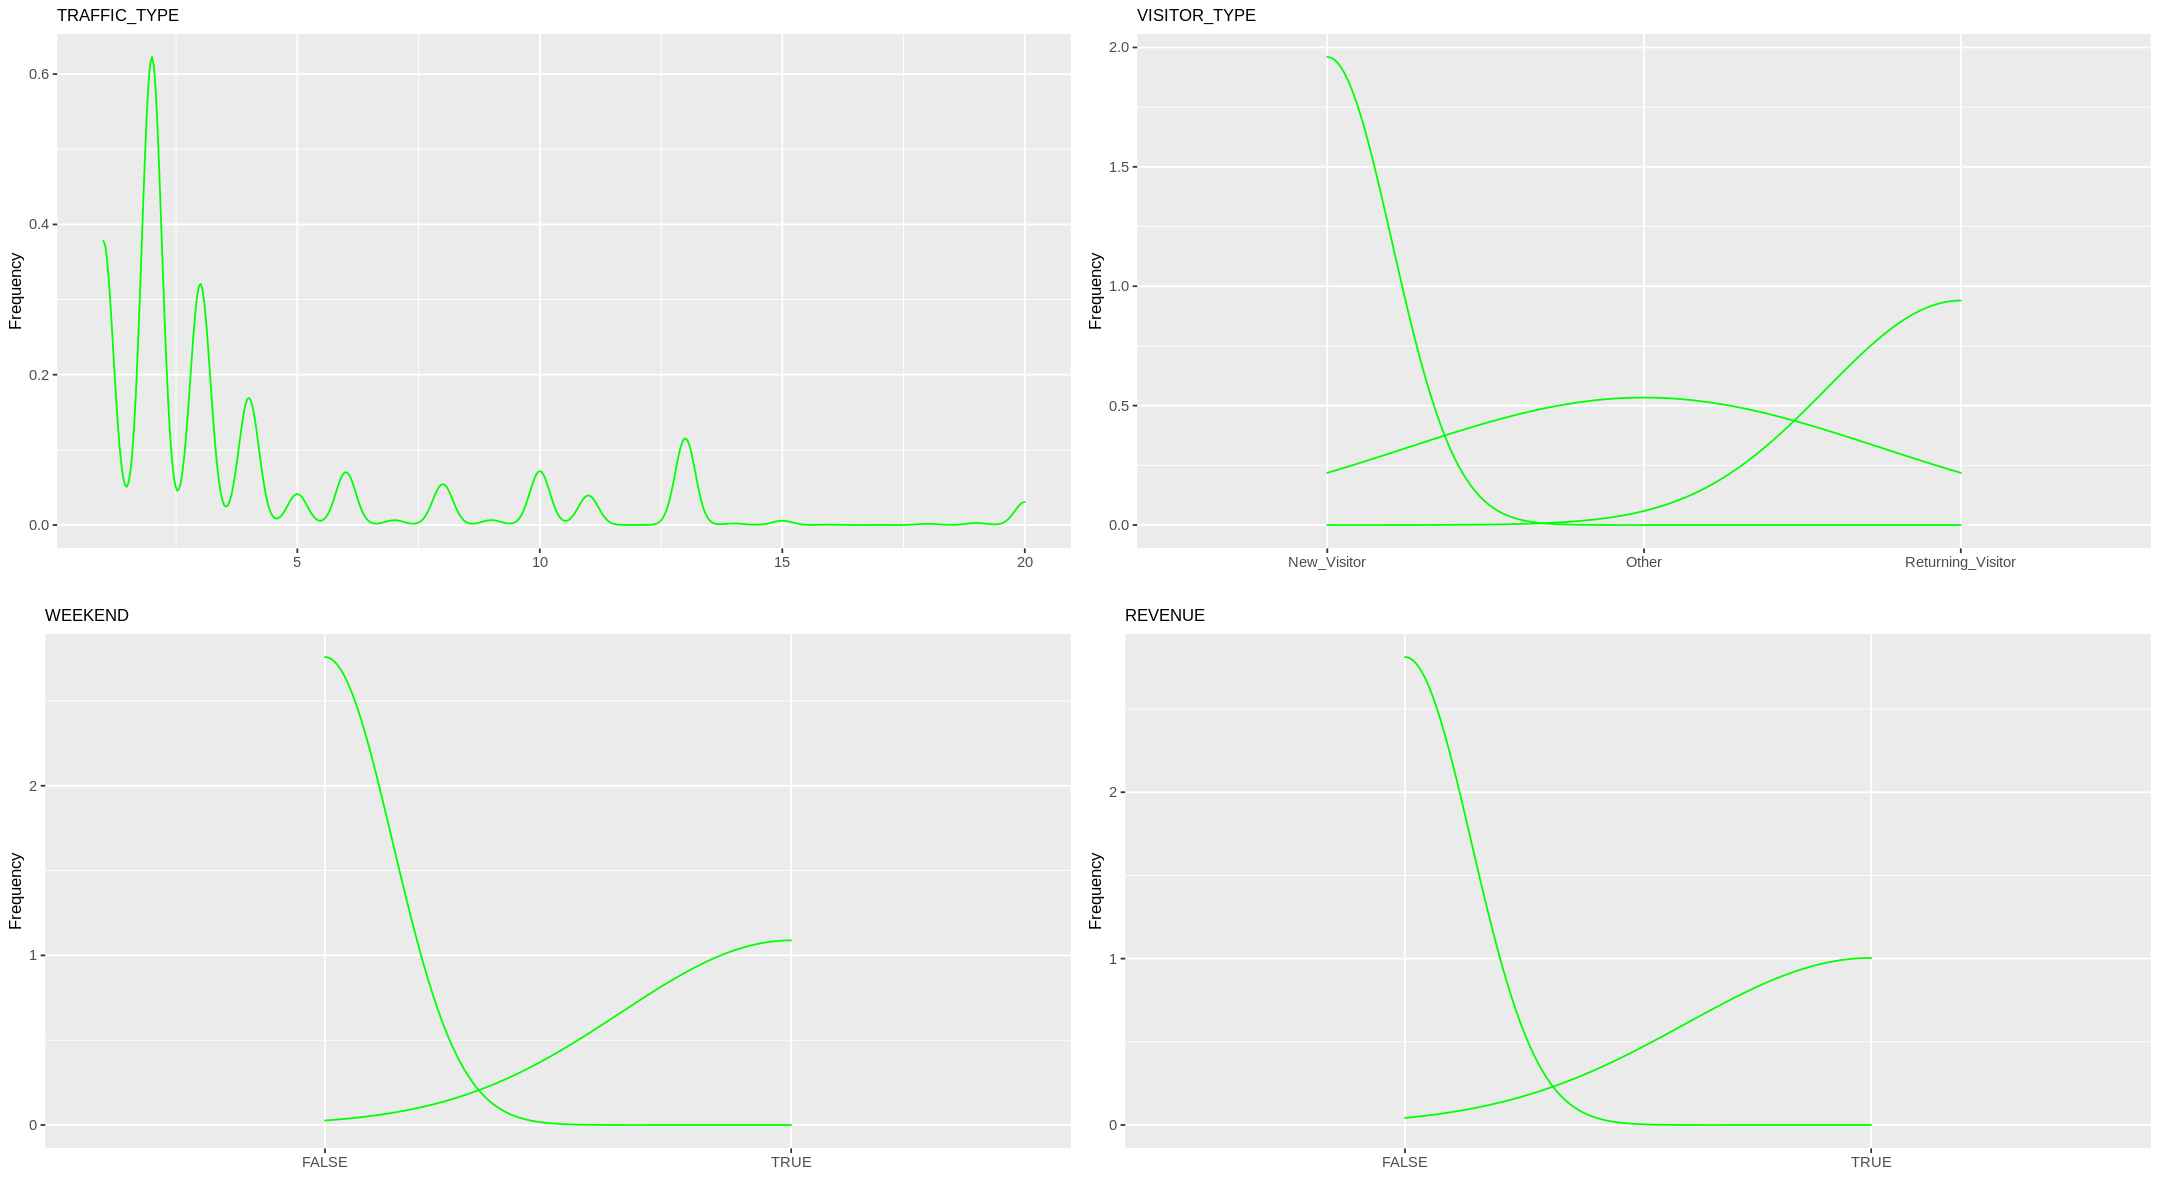

In [60]:
# plotting line plots
fac_cols = c('traffic_type', 'visitor_type', 'weekend', 'revenue')

columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:4){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_density(color = "green") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

###ii) Bivariate and multivariate analysis.

##### a) Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

In [110]:
# create correlation matrix of data
res <- cor(data) 
round(res, 2)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
administrative,1.00,0.60,0.38,0.25,0.43,0.37,-0.21,-0.31,0.10,-0.10,-0.01,-0.03,-0.01,-0.03
administrative_duration,0.60,1.00,0.30,0.24,0.29,0.35,-0.14,-0.20,0.07,-0.07,-0.01,-0.02,-0.01,-0.02
informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.11,-0.16,0.05,-0.05,-0.01,-0.04,-0.03,-0.04
informational_duration,0.25,0.24,0.62,1.00,0.28,0.35,-0.07,-0.10,0.03,-0.03,-0.01,-0.02,-0.03,-0.03
product_related,0.43,0.29,0.37,0.28,1.00,0.86,-0.19,-0.29,0.05,-0.03,0.00,-0.01,-0.04,-0.04
product_related_duration,0.37,0.35,0.39,0.35,0.86,1.00,-0.17,-0.25,0.05,-0.04,0.00,-0.01,-0.03,-0.04
bounce_rates,-0.21,-0.14,-0.11,-0.07,-0.19,-0.17,1.00,0.90,-0.12,0.09,0.03,-0.02,0.00,0.09
exit_rates,-0.31,-0.20,-0.16,-0.10,-0.29,-0.25,0.90,1.00,-0.17,0.12,0.02,0.00,0.00,0.09
page_values,0.10,0.07,0.05,0.03,0.05,0.05,-0.12,-0.17,1.00,-0.06,0.02,0.05,0.01,0.01
special_day,-0.10,-0.07,-0.05,-0.03,-0.03,-0.04,0.09,0.12,-0.06,1.00,0.01,0.00,-0.02,0.05


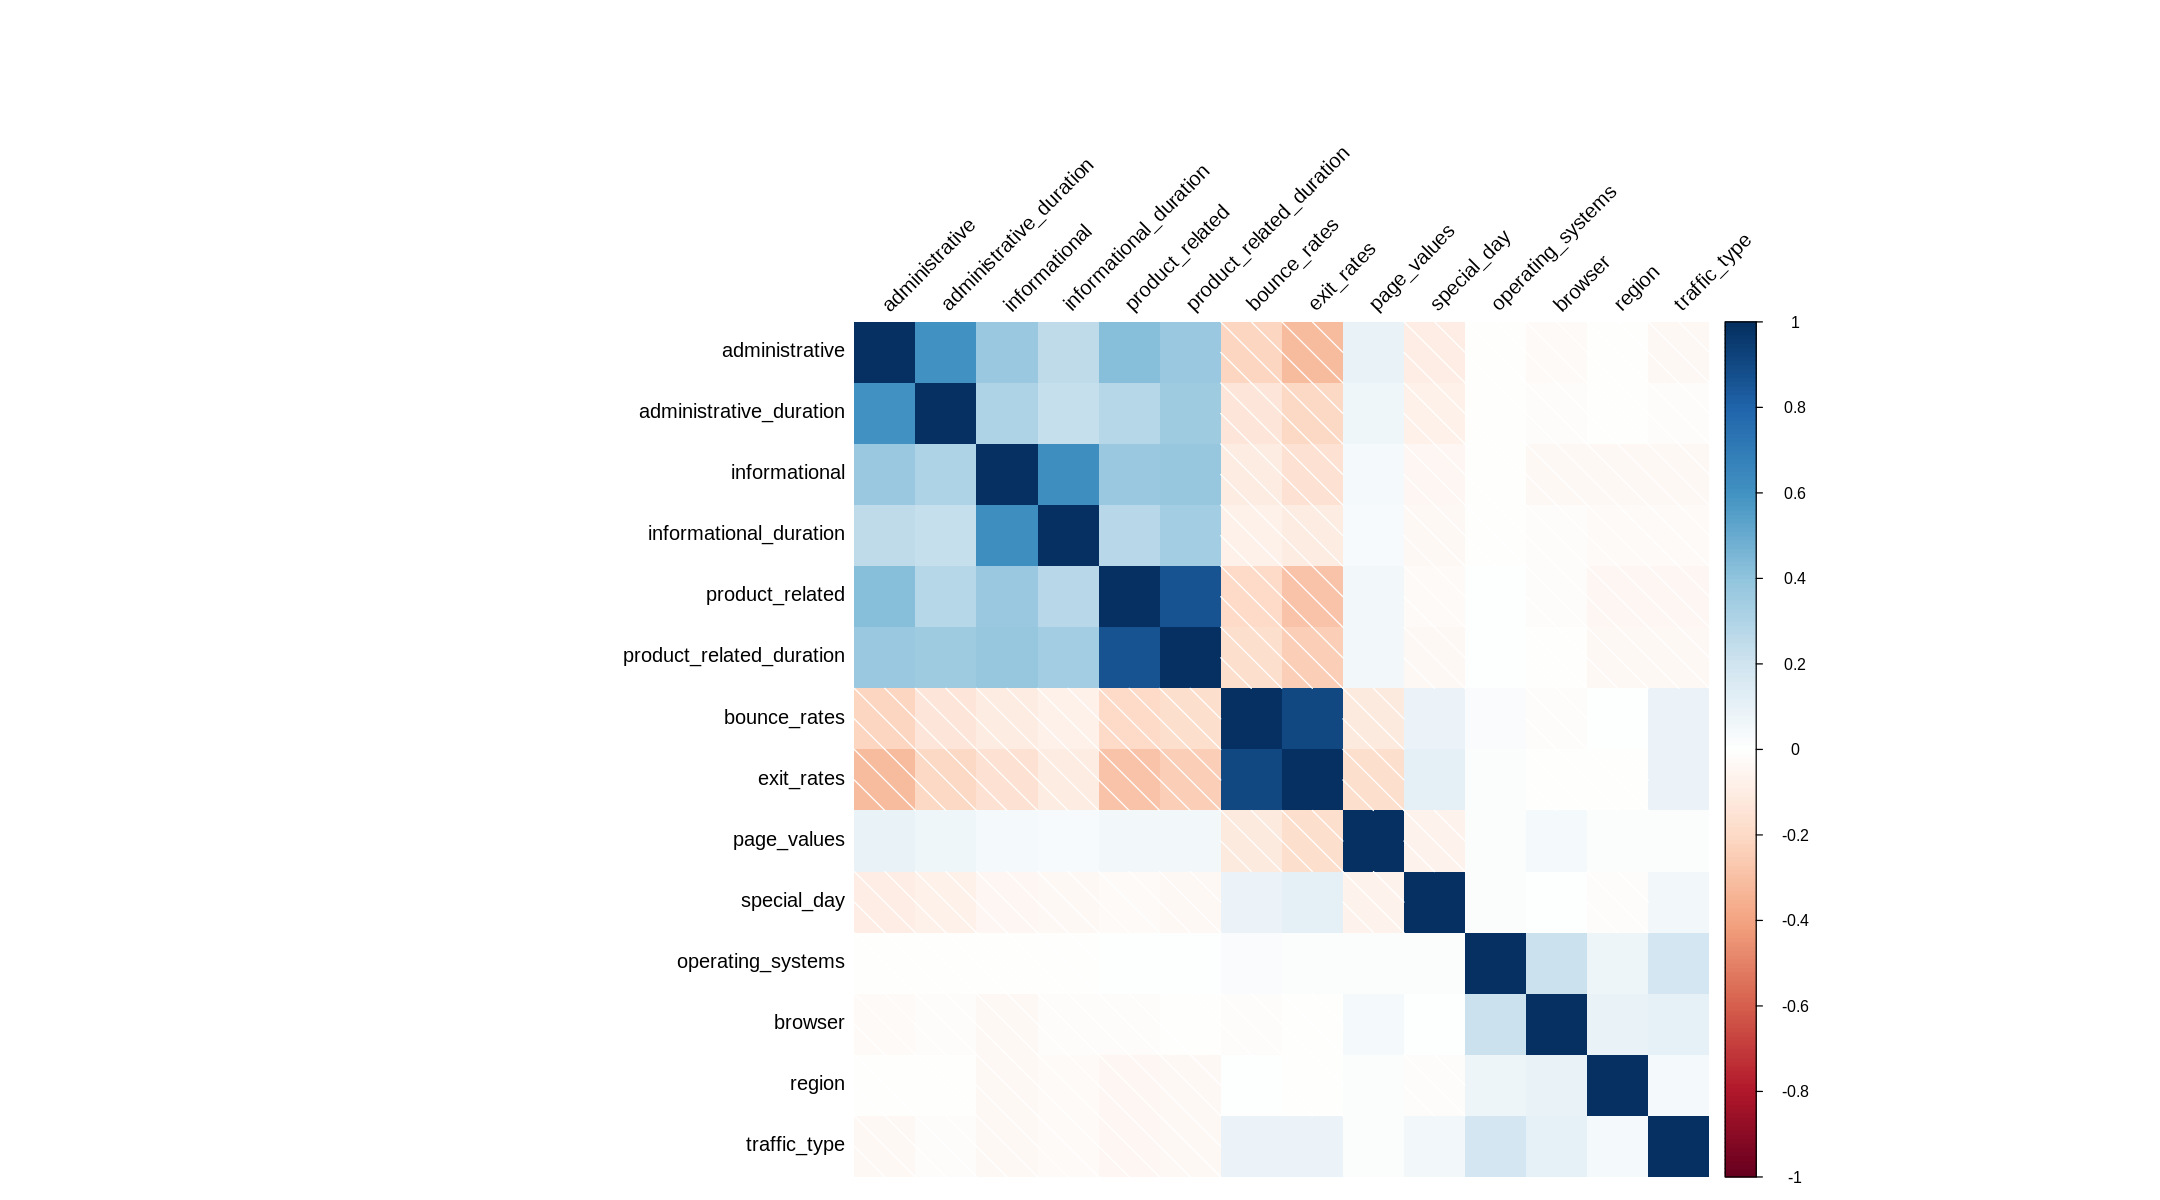

In [109]:
# correlation matrix visualization
corrplot(cor(data), method="shade", tl.col="black", tl.srt=45)

We observe that administrative and administrative duration have a high correlation, likewise with informational and informational duration. Product related and product related duration had the highest correlation so did bounce rates and exit rates.

##### b) Covariance

Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

In [111]:
# create a covariance matrix
cov(data)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,operating_systems,browser,region,traffic_type
administrative,11.09456996,355.034186,1.594806280,120.0493678,63.6117036,2372.71642,-3.231259e-02,-4.794942e-02,6.02328225,-6.457297e-02,-0.0202346516,-1.467931e-01,-5.811216e-02,-0.46527507
administrative_duration,355.03418646,31516.250360,68.273361883,5956.5176708,2270.7315396,120492.06756,-1.106938e+00,-1.658656e+00,219.16838756,-2.649741e+00,-1.2254430835,-4.808302e+00,-2.867667e+00,-10.74727804
informational,1.59480628,68.273362,1.627709681,111.6560227,21.2021821,945.70303,-6.343127e-03,-9.414909e-03,1.12807202,-1.258092e-02,-0.0111385558,-8.460407e-02,-9.341522e-02,-0.18027702
informational_duration,120.04936778,5956.517671,111.656022657,20010.5068642,1760.6514935,94127.86998,-4.506041e-01,-6.733911e-01,79.34843344,-8.840522e-01,-1.2509309060,-4.744986e+00,-9.488517e+00,-14.29469072
product_related,63.61170357,2270.731540,21.202182071,1760.6514935,1989.2412959,73668.63302,-3.918681e-01,-5.902590e-01,45.03245187,-2.309712e-01,0.1654644428,-1.045692e+00,-4.297450e+00,-7.94246492
product_related_duration,2372.71642208,120492.067559,945.703033133,94127.8699847,73668.6330189,3686121.49674,-1.520023e+01,-2.178350e+01,1821.19282970,-1.465110e+01,4.8336097976,-2.574253e+01,-1.608036e+02,-289.18113001
bounce_rates,-0.03231259,-1.106938,-0.006343127,-0.4506041,-0.3918681,-15.20023,2.061387e-03,1.896814e-03,-0.09825801,7.964769e-04,0.0011052489,-1.244059e-03,1.561995e-04,0.01626348
exit_rates,-0.04794942,-1.658656,-0.009414909,-0.6733911,-0.5902590,-21.78350,1.896814e-03,2.138800e-03,-0.14976966,1.078620e-03,0.0006913464,-2.820677e-04,-2.041634e-04,0.01622937
page_values,6.02328225,219.168388,1.128072018,79.3484334,45.0324519,1821.19283,-9.825801e-02,-1.497697e-01,348.11318376,-2.404591e-01,0.3144812432,1.463173e+00,4.747272e-01,0.91686751
special_day,-0.06457297,-2.649741,-0.012580917,-0.8840522,-0.2309712,-14.65110,7.964769e-04,1.078620e-03,-0.24045911,3.988432e-02,0.0023108732,1.184051e-03,-7.893768e-03,0.04236803


##### c) Scatter plots

Scatter plots are used to observe relationships between variables.

In [116]:
names(data)

[1] "administrative"           "administrative_duration" 
 [3] "informational"            "informational_duration"  
 [5] "product_related"          "product_related_duration"
 [7] "bounce_rates"             "exit_rates"              
 [9] "page_values"              "special_day"             
[11] "operating_systems"        "browser"                 
[13] "region"                   "traffic_type"

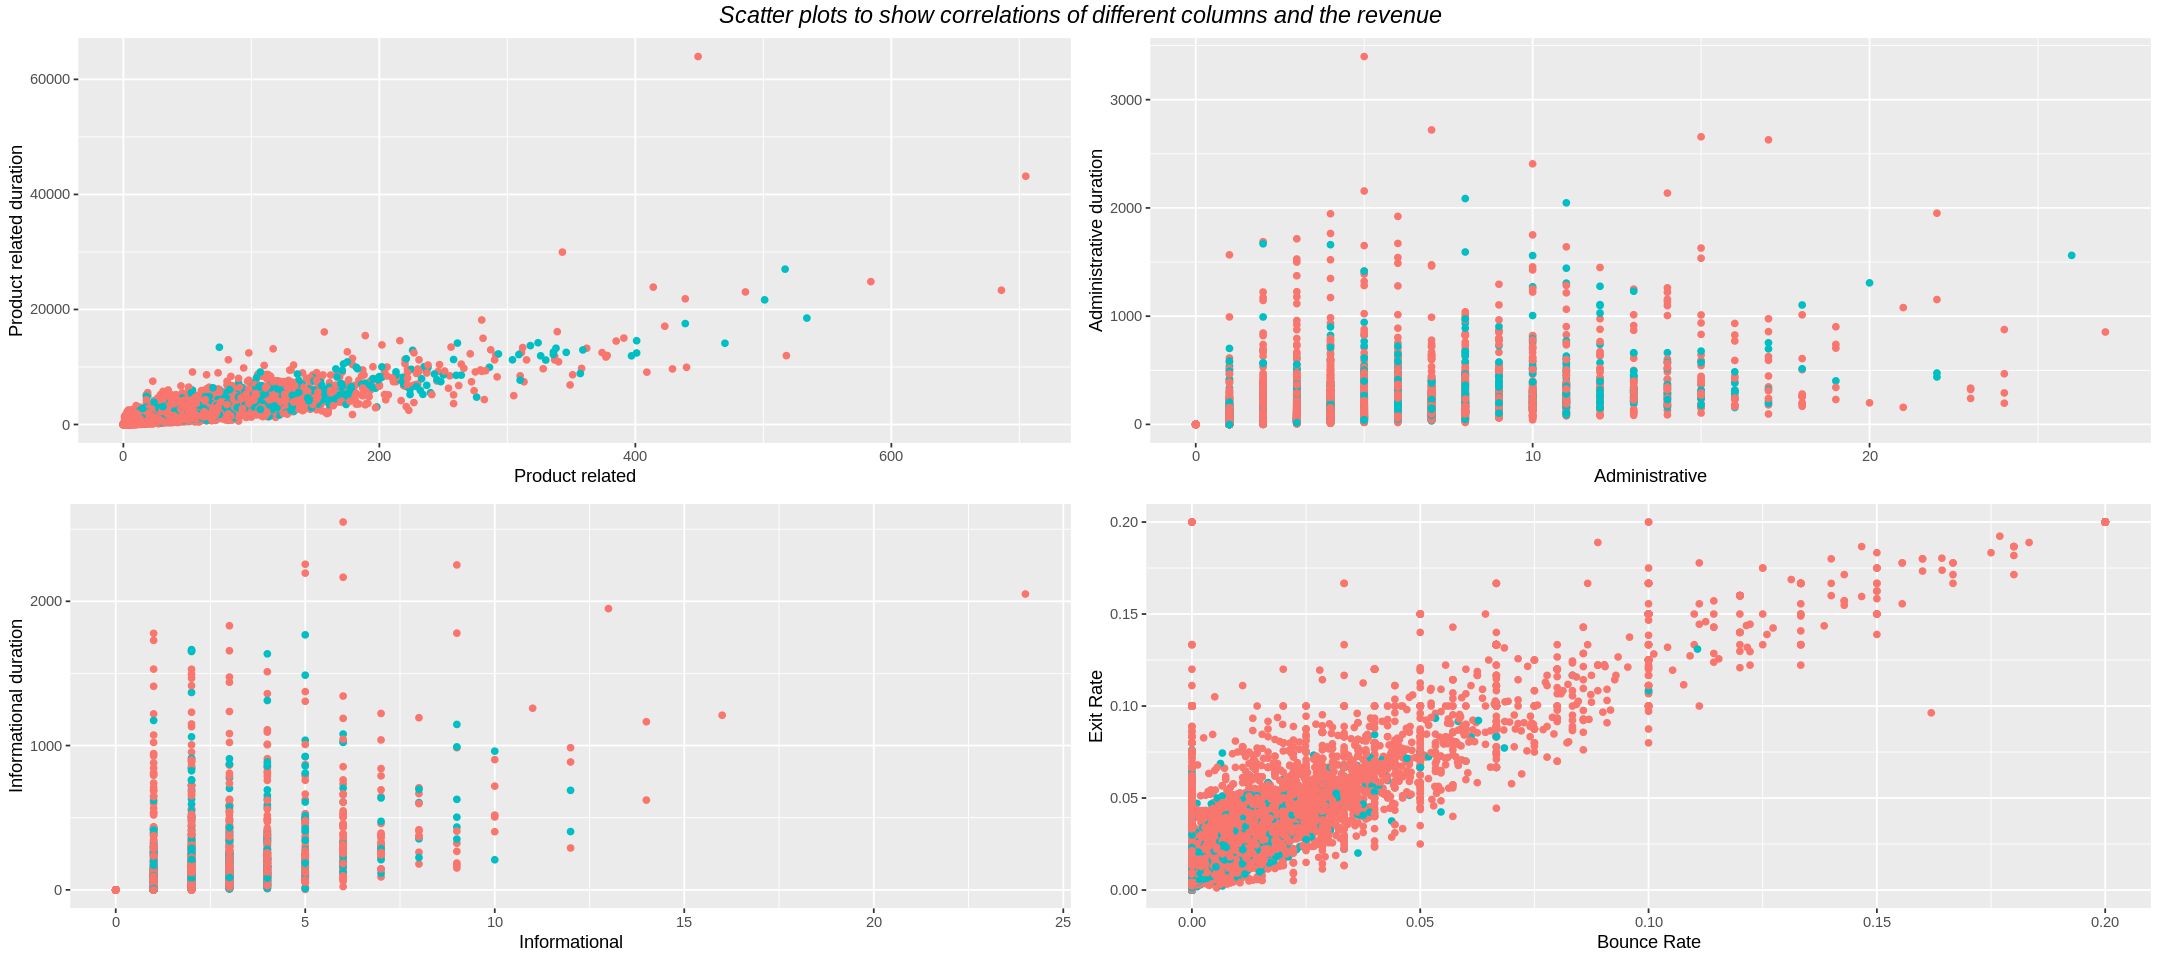

In [114]:
# scatter plots 
options(repr.plot.width = 18, repr.plot.height = 8)

s1 = ggplot(eda, aes(product_related, product_related_duration, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x='Product related', y ='Product related duration')

s2 = ggplot(eda, aes(administrative, administrative_duration, col = revenue)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Administrative', y = 'Administrative duration')

s3 = ggplot(eda, aes(informational, informational_duration, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x = 'Informational', y = 'Informational duration')

s4 = ggplot(eda, aes(bounce_rates,	exit_rates, col = revenue)) + 
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Bounce Rate', y = 'Exit Rate')

grid.arrange(p1, p2, p3, p4, ncol = 2,
             top = textGrob("Scatter plots to show correlations of different columns and the revenue",gp=gpar(fontsize=14,font=3)))



We observe that most people who were on the product page spent little time before the bought something. We we look at the administrative duration and administrative the distribution is almost similar. Likewise with the informational and the informational duration. For the exit and bounce rates most customers who did no buy anything had faster rates of exit and bounce compared to those that did.

####PCA




First we need to encode categorical columns.

In [61]:
# get the cat columns. Note for the columns that are not categorical but boolean we will convert to factor in order to use our catencoders package
# make a copy of sol
sol <- cbind(eda)
dim(sol)

sol$revenue <- as.factor(sol$revenue)
sol$weekend <- as.factor(sol$weekend)

[1] 12199    18

In [ ]:
# get structure of new copy
str(sol)

'data.frame':	12199 obs. of  18 variables:
 $ administrative          : int  0 0 0 0 0 0 0 1 0 0 ...
 $ administrative_duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ informational           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ informational_duration  : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ product_related         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ product_related_duration: num  0 64 -1 2.67 627.5 ...
 $ bounce_rates            : num  0.2 0 0.2 0.05 0.02 ...
 $ exit_rates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ page_values             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ special_day             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ month                   : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ operating_systems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ browser                 : int  1 2 1 2 3 2 4 2 2 4 ...
 $ region                  : int  1 1 9 2 1 1 3 1 2 1 ...
 $ traffic_type            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ visitor_type            : Factor

In [62]:
# encode the categorical columns
library(CatEncoders)
# Saving names of categorical variables
factors <- names(which(sapply(sol, is.factor)))

# Label Encoder
for (i in factors){
  encode <- LabelEncoder.fit(sol[, i])
  sol[, i] <- transform(encode, sol[, i])
}
head(sol)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,3,1,1,1,1,3,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,3,2,2,1,2,3,1,1
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,3,4,1,9,3,3,1,1
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,3,2,2,4,3,1,1
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,3,1,4,3,2,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,3,2,2,1,3,3,1,1


Success!!!

In [63]:
# install package to Extract important features
install.packages("factoextra")
require(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [64]:
# Normalising the data
sol = as.data.frame(apply(sol, 2,  function(x) (x - min(x))/max(x) - min(x)))

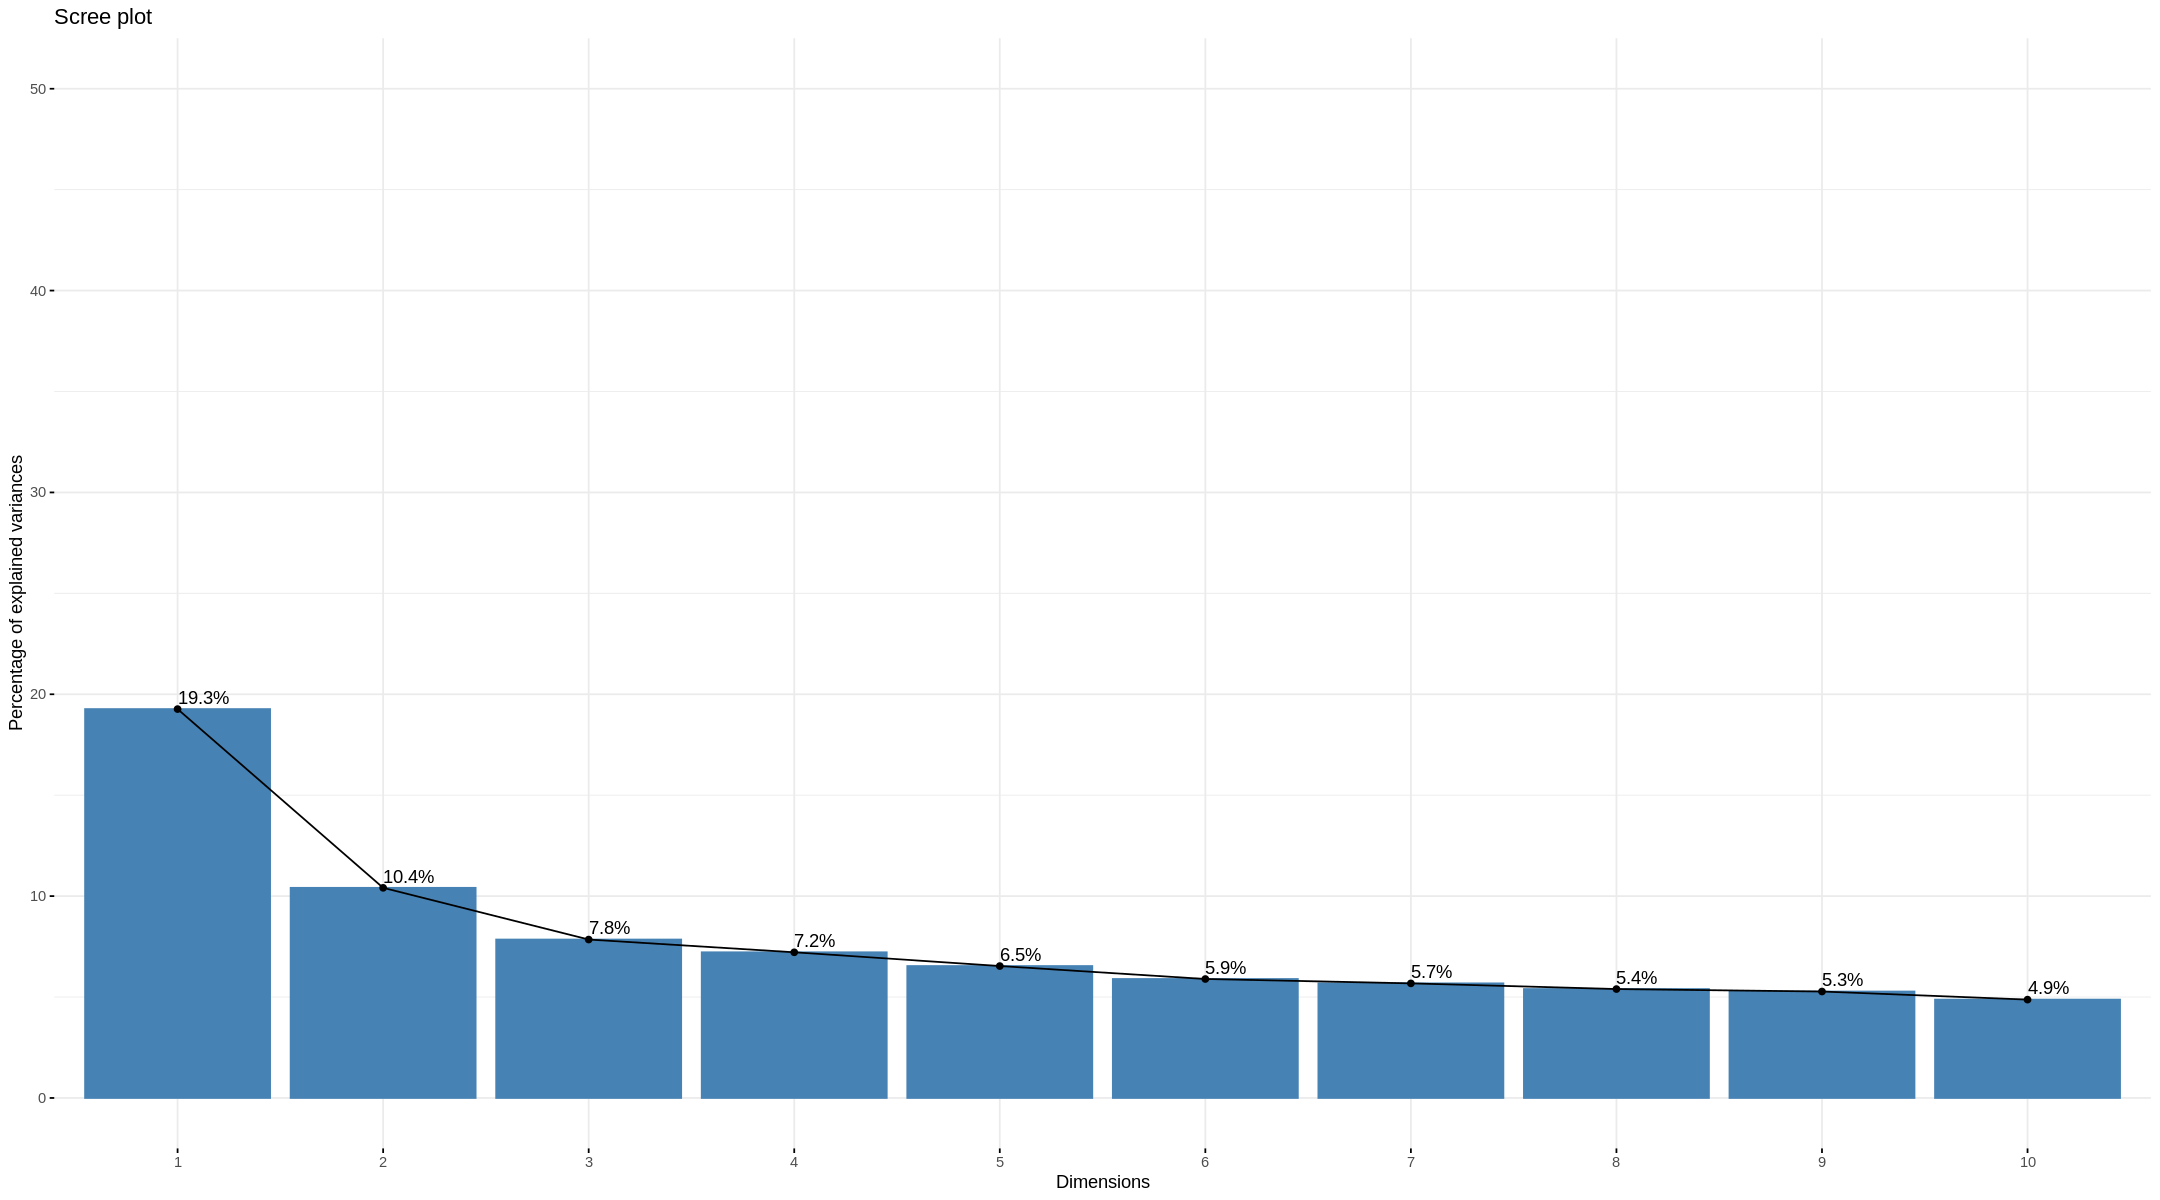

In [ ]:
# extracting the most important features
library(factoextra)
library(FactoMineR)
res.pca <- PCA(sol,  graph = FALSE)# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

From the screeplot above we see that 10 columns capture 78.7% of the variance. We see PC1 captured 19.3 percent of the variance. We need to now extract the results of the PCA.

In [79]:
# install the farver package which eliminates the color decoding error.
install.packages("farver")
require(farver)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: farver



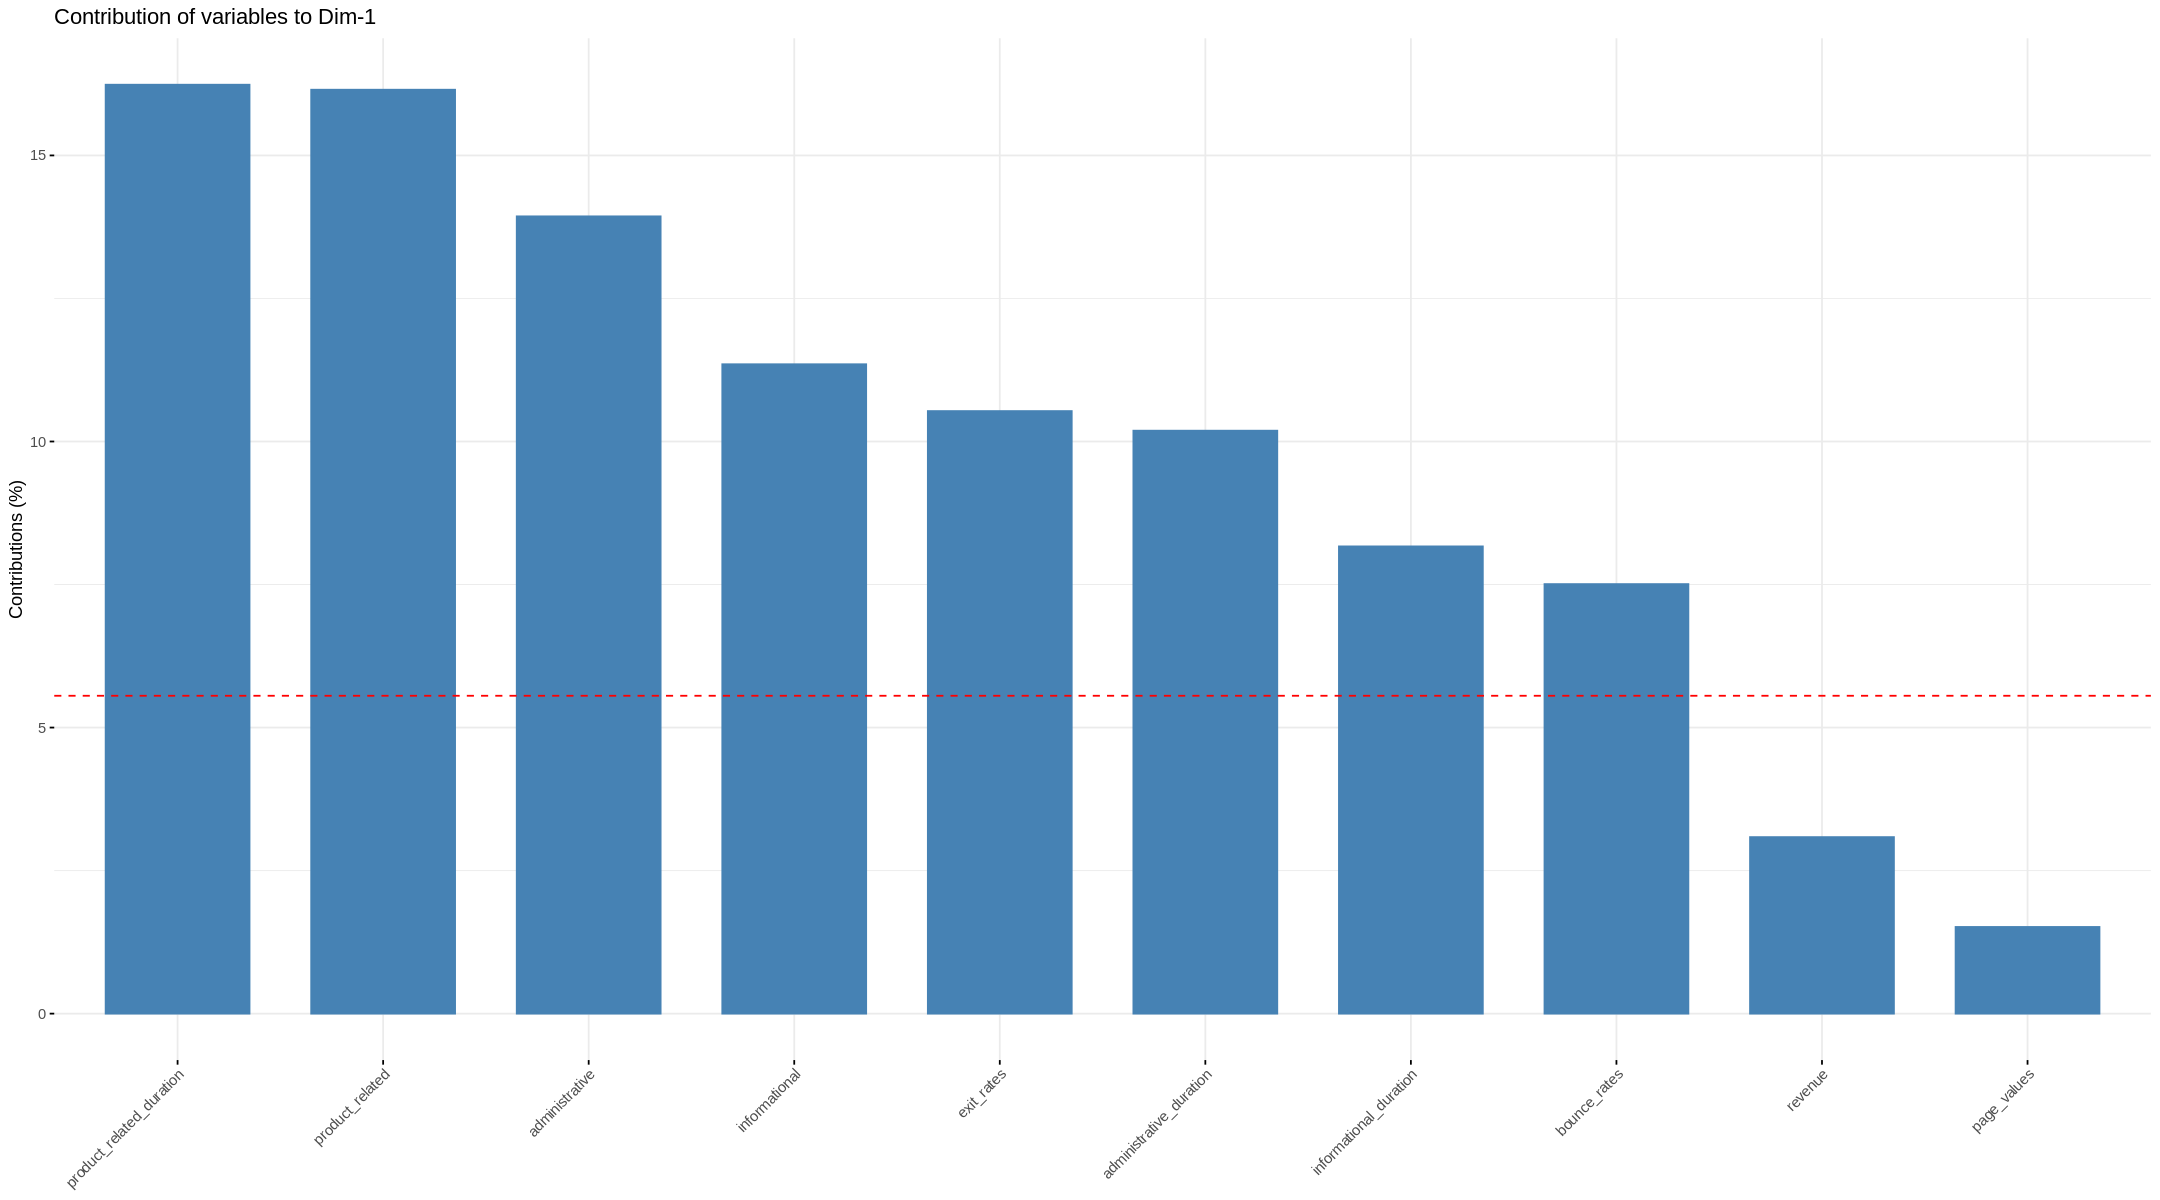

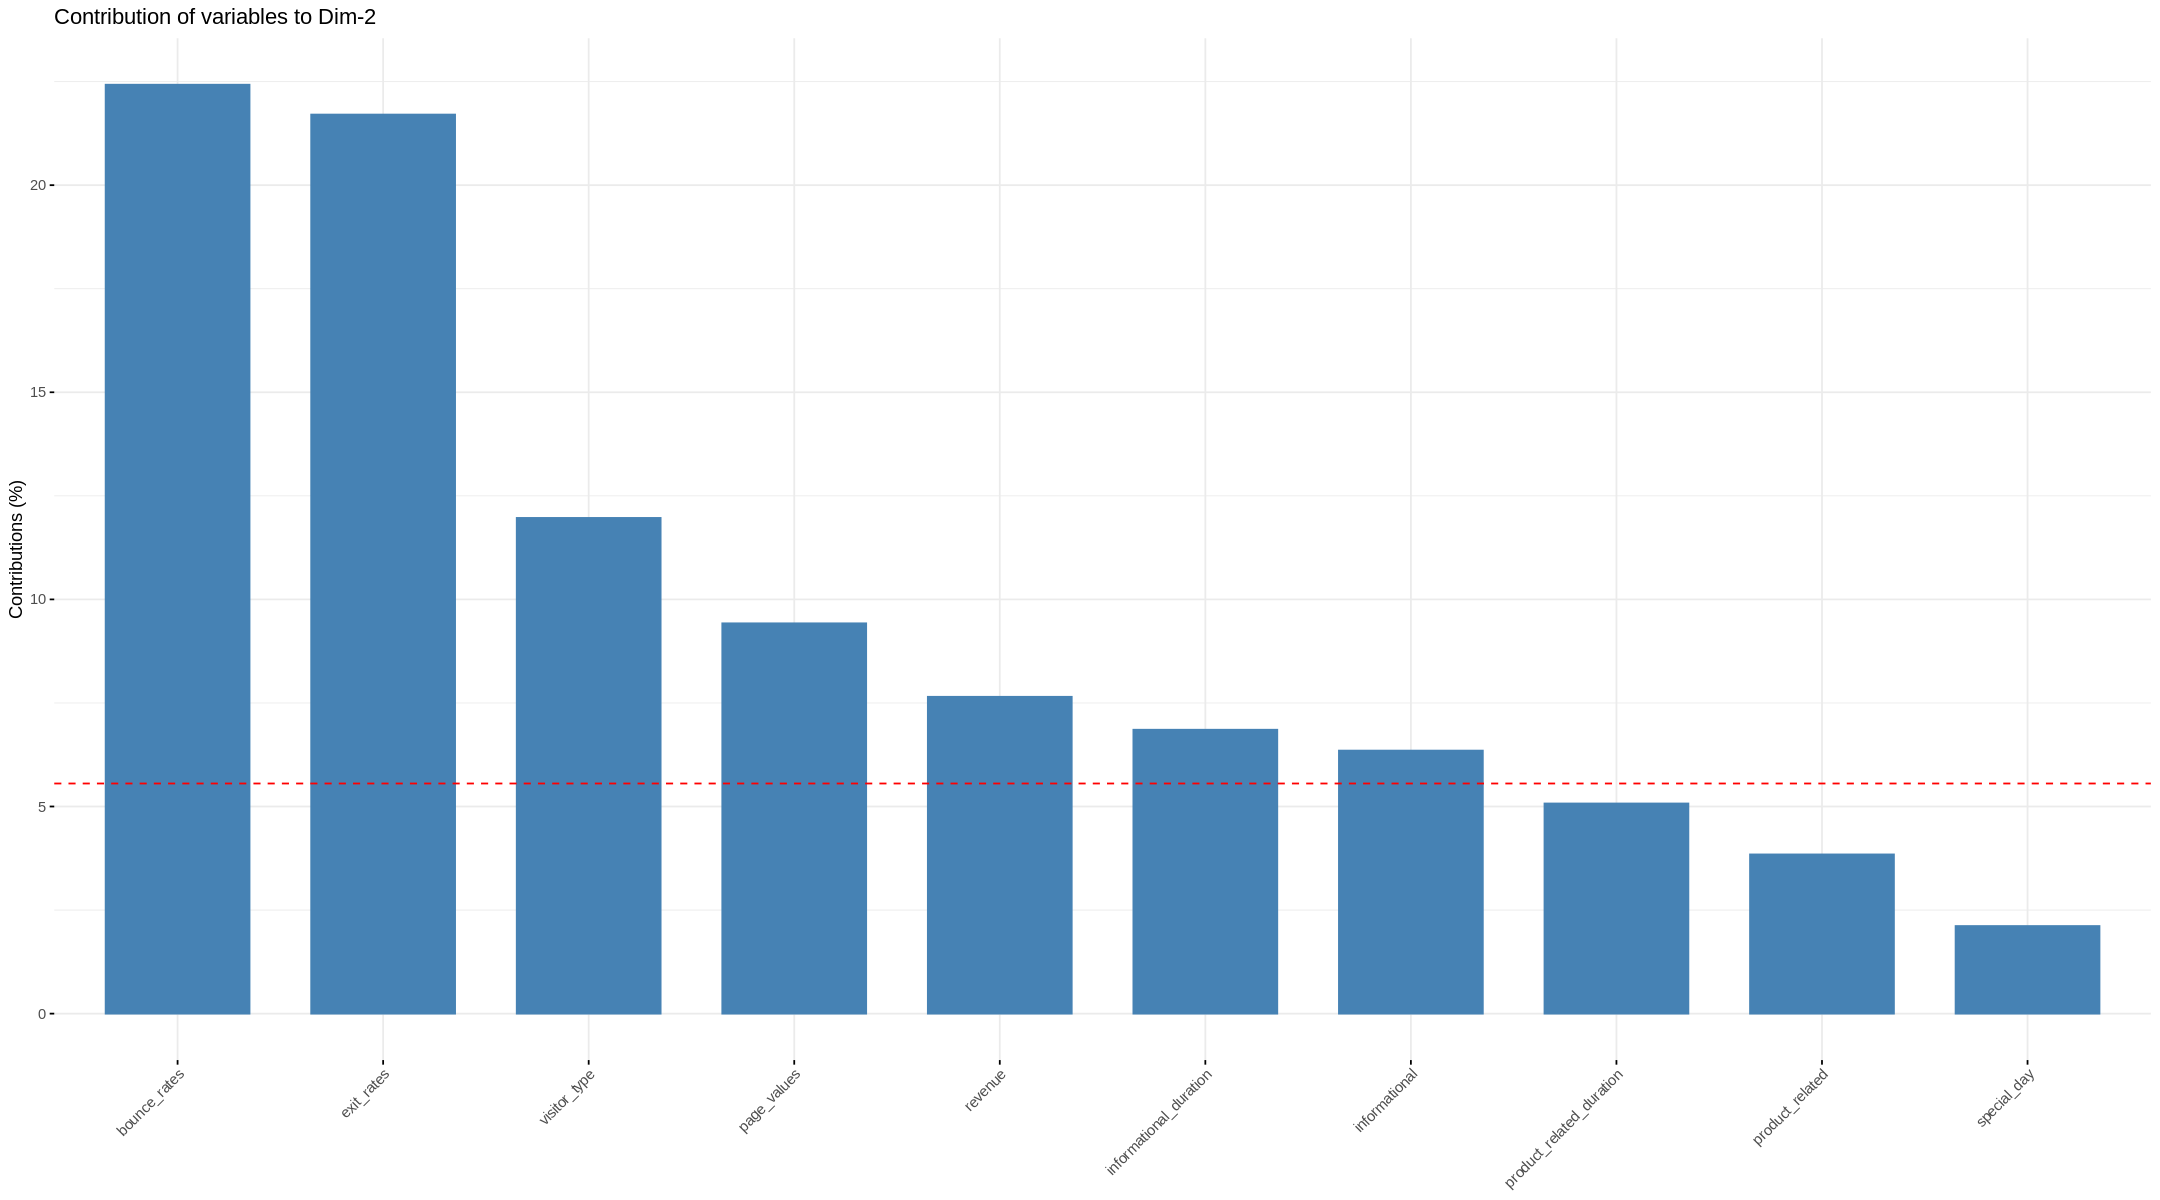

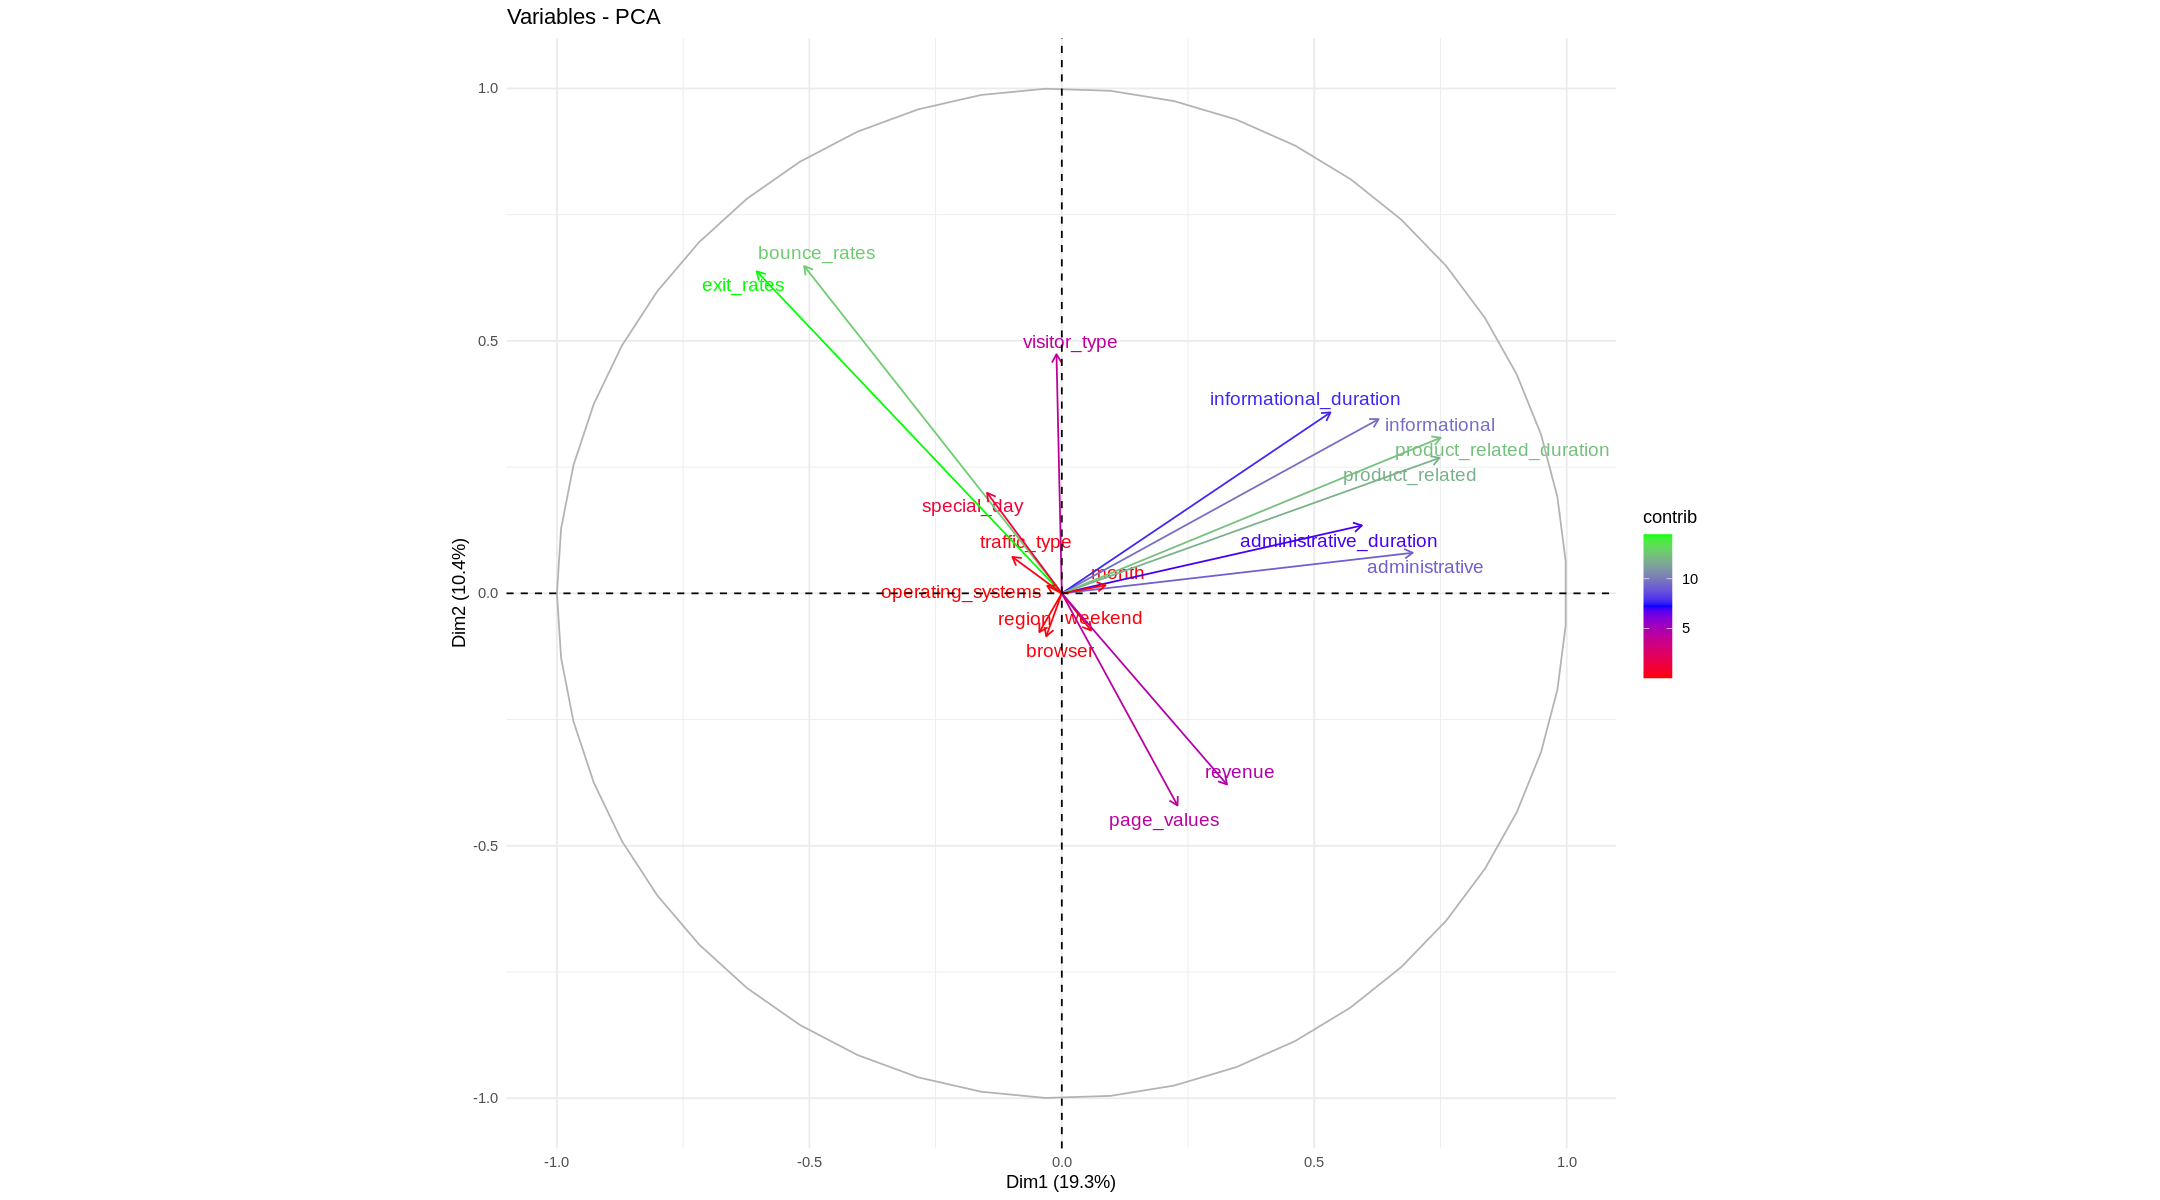

In [ ]:
# Extract the results for variables
var <- get_pca_var(res.pca)# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("red", "blue", "green"),
             repel = TRUE) + theme_minimal() + ggtitle("Variables - PCA")

# below we can see the 10 features with highest contribution

Exit_rate, special day, traffic type and bounce rate tend to increase together. Informational duration, informational, product related duration, product related, administrative duration, administrative and month tend to increase together. This two groups are inversely related. 

Region and browser tend to increase together and weekend, page_values and revenue tend to increase together. this groups are inversely related.

It is however important to not the strength of the contribution where the highest contributors are Exit rate, traffic type, product related and product related duration.

## 5. Implementing the solution.

Find article about finding the optimal k [here](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/).

Why Kmeans? It has the following advantages: 
1. Relatively simple to implement.
2. Scales to large datasets.
3. Guarantees convergence.
4. Easily adapts to new examples.
5. Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

It also has the following limitations:
1. Manual selection of "k".
2. Dependent on initial values i.e (initial centroids).
3. Clustering data with varying sizes and density.
4. Is affected by outliers.


### Elbow method

This is the sum of squares at each number of clusters is calculated and graphed, and the user looks for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters.

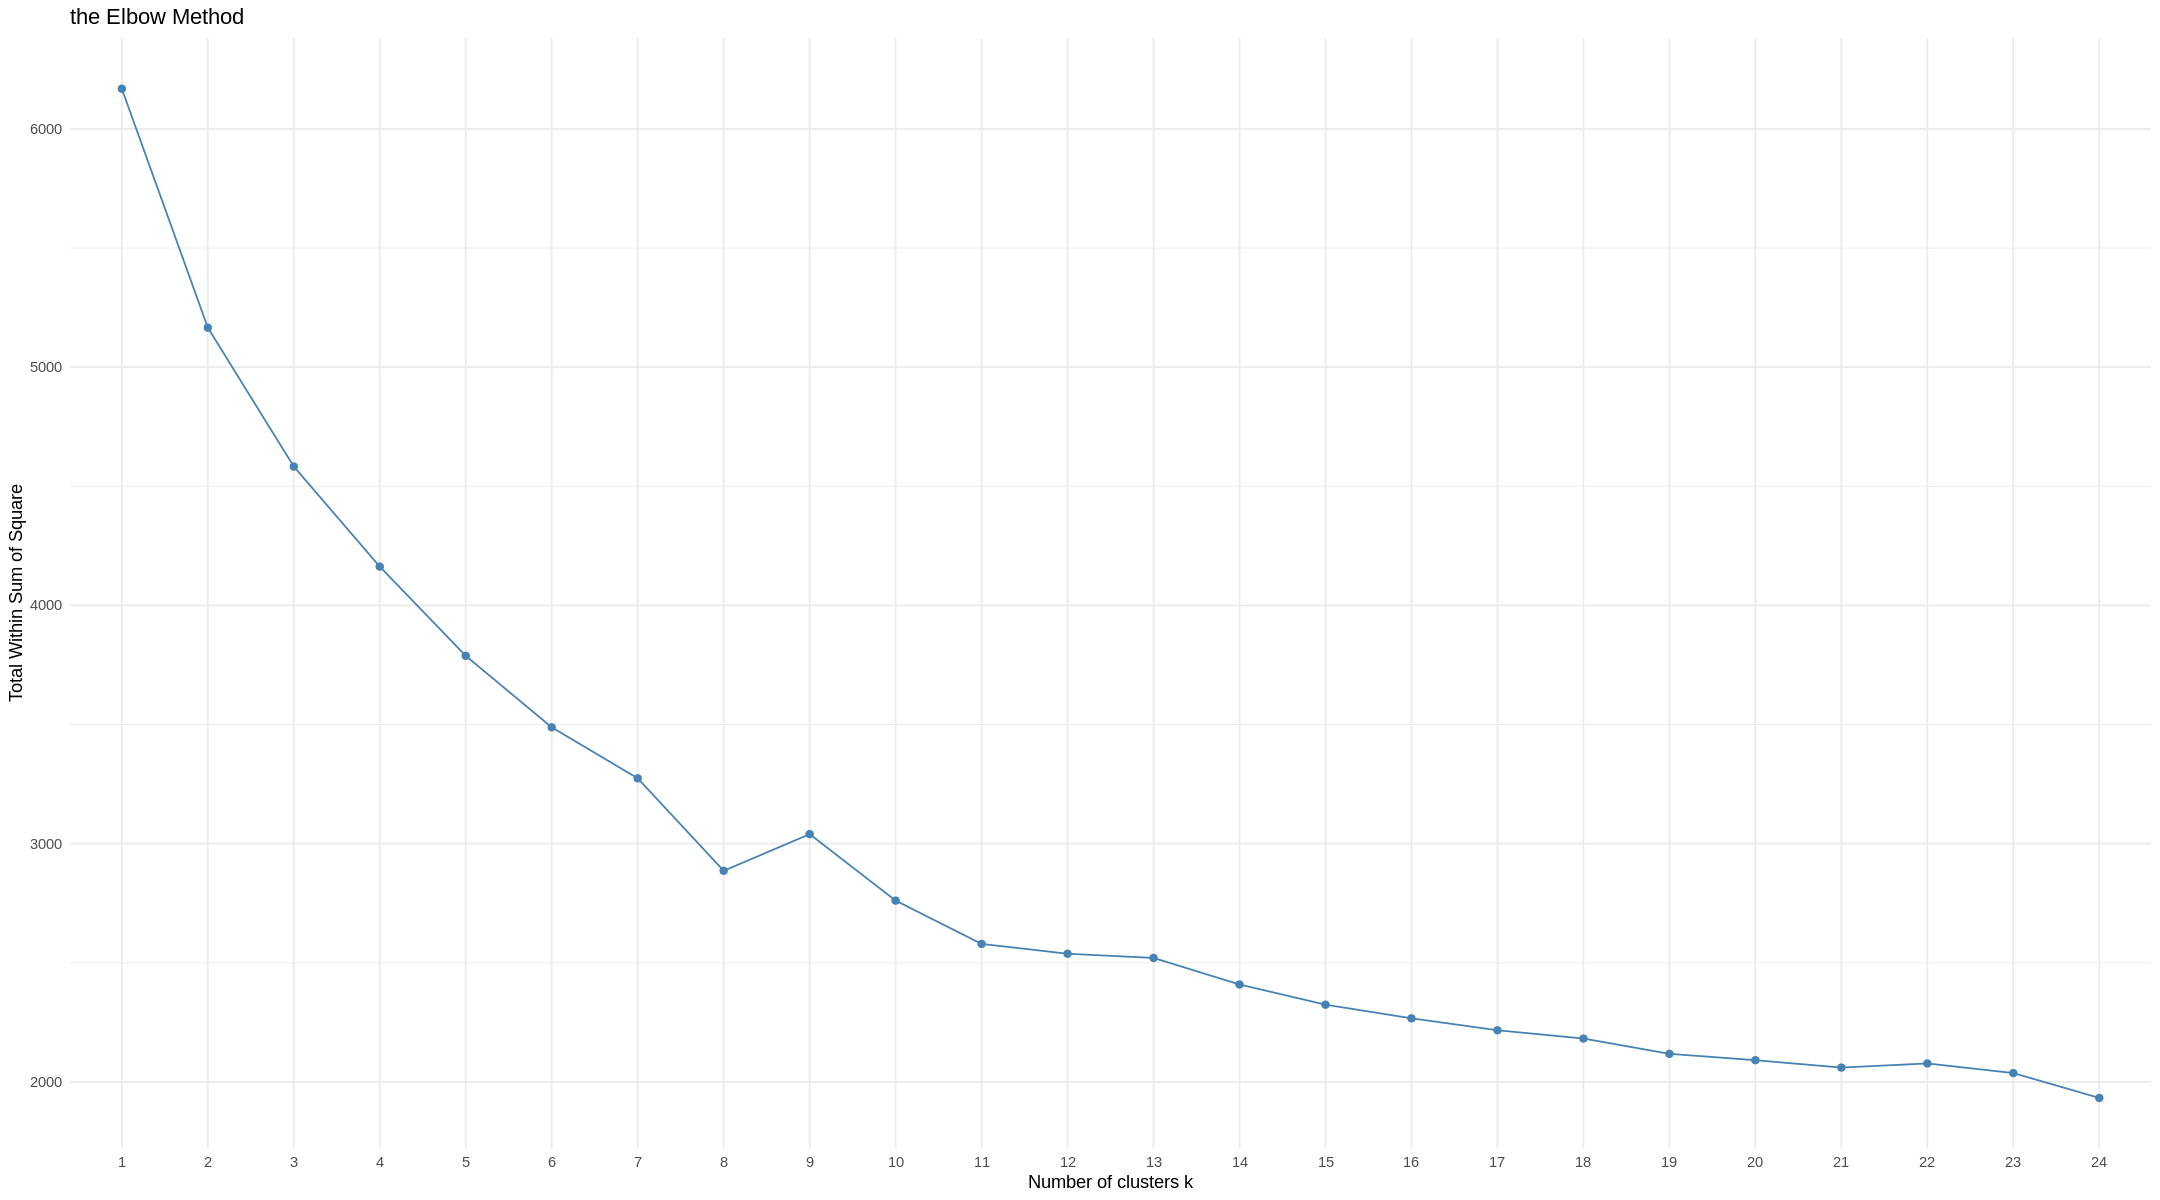

In [142]:
# find the optimal value of K using the elbow method
set.seed(0)
# function to compute total within-cluster sum of squares
fviz_nbclust(sol, kmeans, method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")

We observe that the elbow appears at 8 clusters. According to the elbow method the optimal number of clusters is between 6 and 8.

### Kmeans clustering.

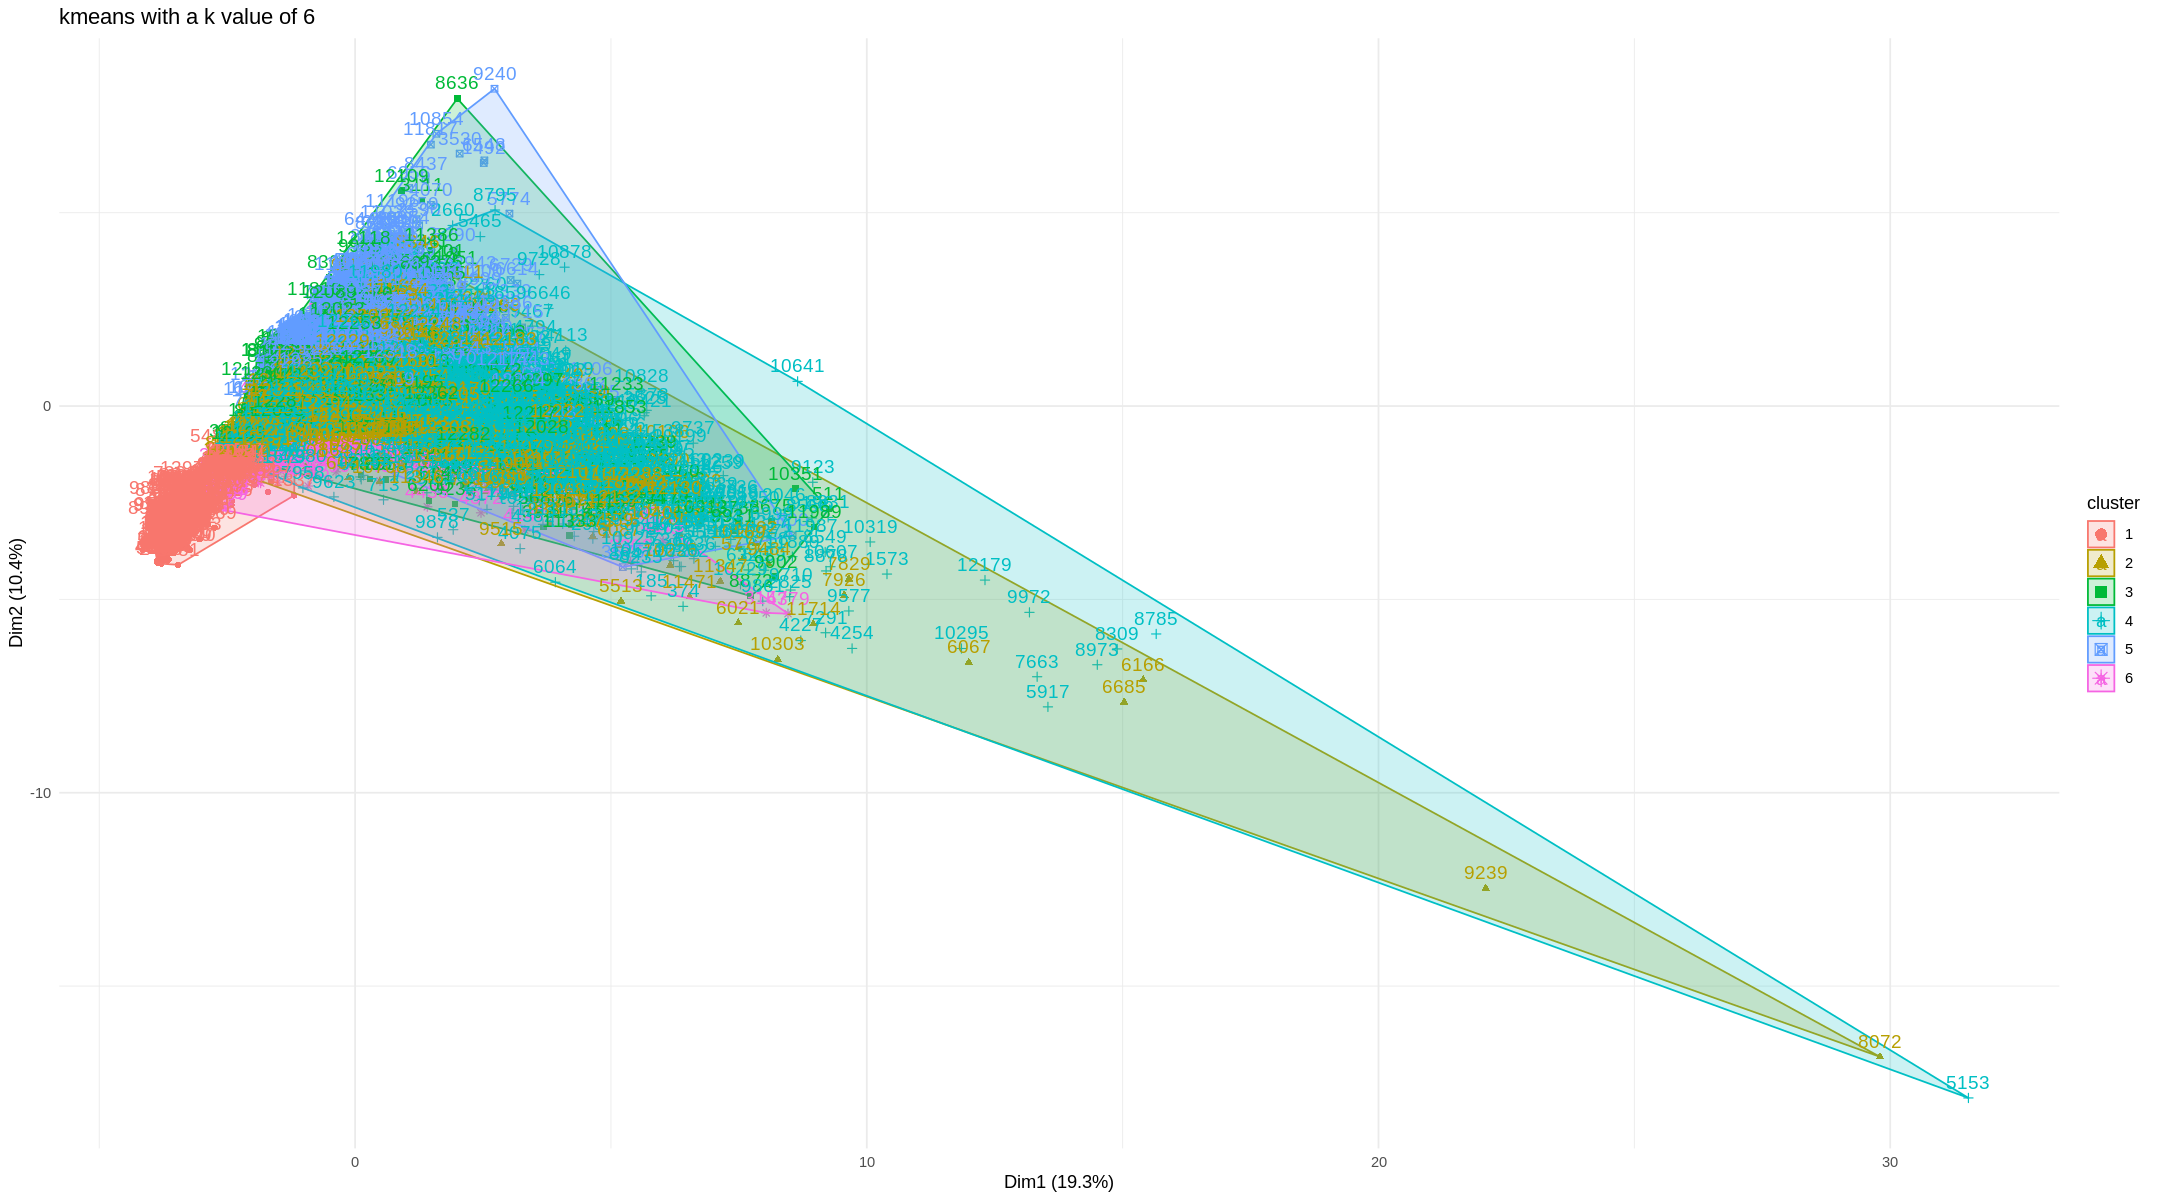

In [71]:
# run kmeans 
final <- kmeans(sol, 6, nstart = 30)
fviz_cluster(final, data = sol) + theme_minimal() + ggtitle("kmeans with a k value of 6")

Using the kmeans to find the characteristics of the individual clusters.

### Radar graphs

In [72]:
as.data.frame(sol) %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% summarise_all("mean") %>% kable() %>% kable_styling()

In [90]:
# install the ggiraphExtra package to use to plot the ggradar graph
install.packages("ggiraphExtra")
require(ggiraphExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nortest’, ‘insight’, ‘tweenr’, ‘polyclip’, ‘flextable’, ‘officer’, ‘moonBook’, ‘ggiraph’, ‘mycor’, ‘ppcor’, ‘sjlabelled’, ‘sjmisc’, ‘ggforce’, ‘ztable’


Loading required package: ggiraphExtra



Joining, by = "rowname"



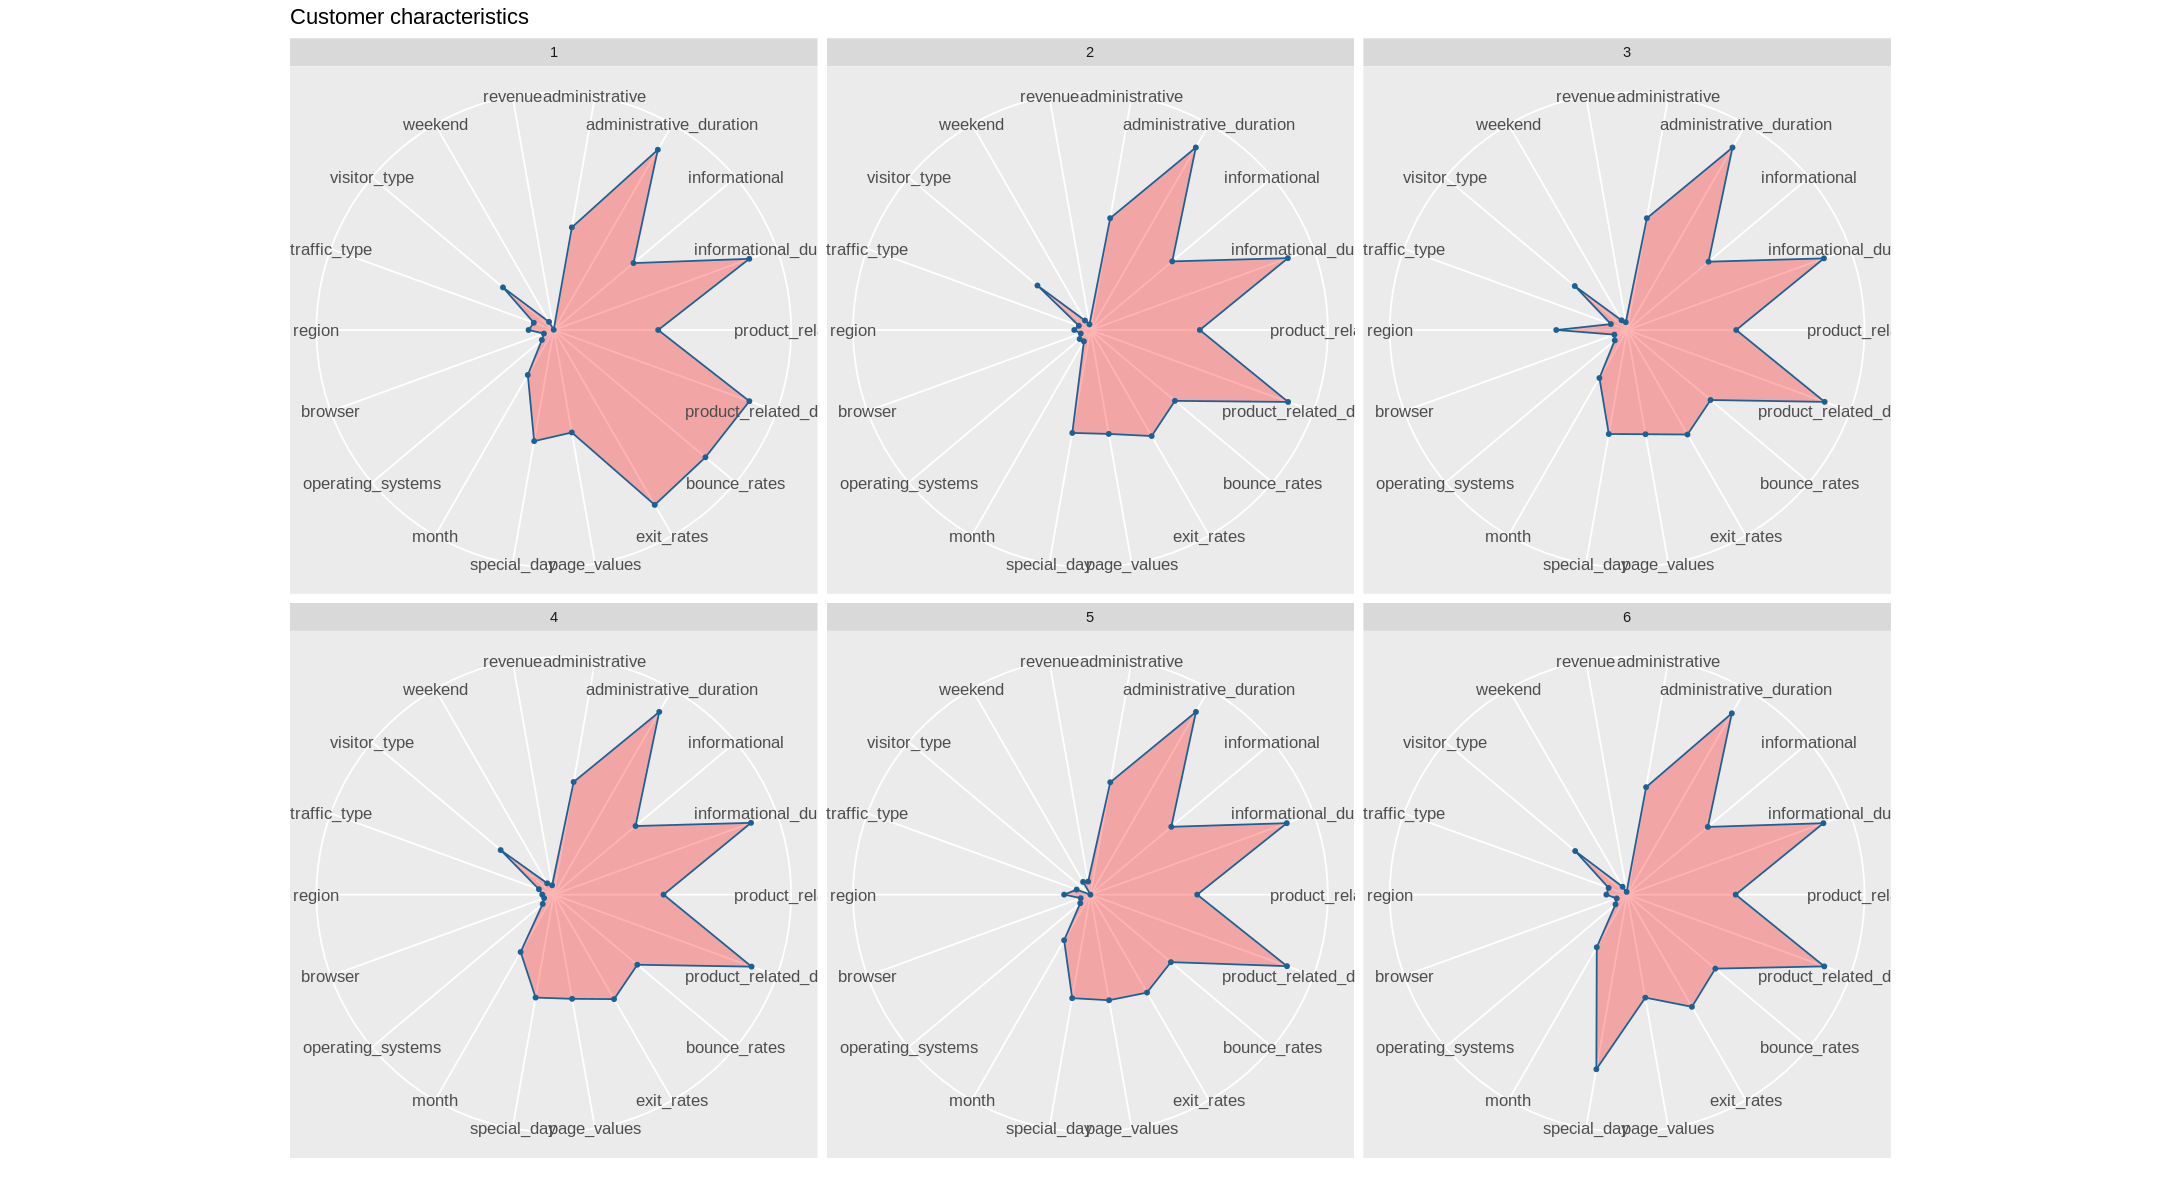

In [93]:
# plot a radar plot for the characteristics of different clusters
library(ggiraphExtra)

# convert rownames to the first column from the sol data frame
sol_df <- as.data.frame(sol) %>% rownames_to_column()

# convert rownames to the first column from the cluster data
cluster_pos <- as.data.frame(final$cluster) %>% rownames_to_column()

# get the column names
colnames(cluster_pos) <- c("rowname", "cluster")

# join the cluster_position and sol_df data
sol_final <- inner_join(cluster_pos, sol_df)

# radar plot
ggRadar(sol_final[-1], aes(group = cluster), rescale = FALSE, legend.position = "none", size = 1, interactive = FALSE, use.label = TRUE) + facet_wrap(~cluster) + scale_y_discrete(breaks = NULL) + # don't show ticks
theme(axis.text.x = element_text(size = 10)) + scale_fill_manual(values = rep("red", nrow(sol_final))) +
scale_color_manual(values = rep("#1c6193", nrow(sol_final))) +
ggtitle("Customer characteristics")

From the radar plots we can tell the characteristics of different clusters. We can see that cluster 1 has a high bouncing rate and a high exit rate. 

## 6. Challenging the solution.

### Choosing appropriate agorithm

In [65]:
# load the clValid package which will help us find the best algorithm to use and cluster information
install.packages("clValid")
require(clValid)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: clValid

Loading required package: cluster



In [68]:
# cross validation of 500 rows cluster sizes of range (2 to 24) methods are hierarchical, kmeans and pam.
intern <- clValid(sol[1:500,], nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")

In [66]:
# package to build and manipulate table styles
install.packages("kableExtra")
require(kableExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’


Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [174]:
# find summary statistics
library(kableExtra)
summary(intern) %>% kable() %>% kable_styling()


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

Validation Measures:
                                  2        3        4        5        6        7        8        9       10       11       12       13       14       15       16       17       18       19       20       21       22       23       24
                                                                                                                                                                                                                                         
hierarchical Connectivity    4.4591  11.5619  14.4909  18.9889  19.8583  22.7873  25.9829  34.6655  42.8032  42.8032  62.5401  99.1627 104.9841 108.4615 112.7083 116.9234 120.8313 126.2877 126.2877 126.3988 129.3278 133.4067 137.1877
             Dunn            0.2154   0.2220   0.2220   0.2220   0.2445   0.2445   0.2445   0.2242   0.1781   0.1781   0.1427   0.1138   0.1138   0.11

From this the best model to use is the heirarchical method. The number of clusters is about 2.

### Building the model

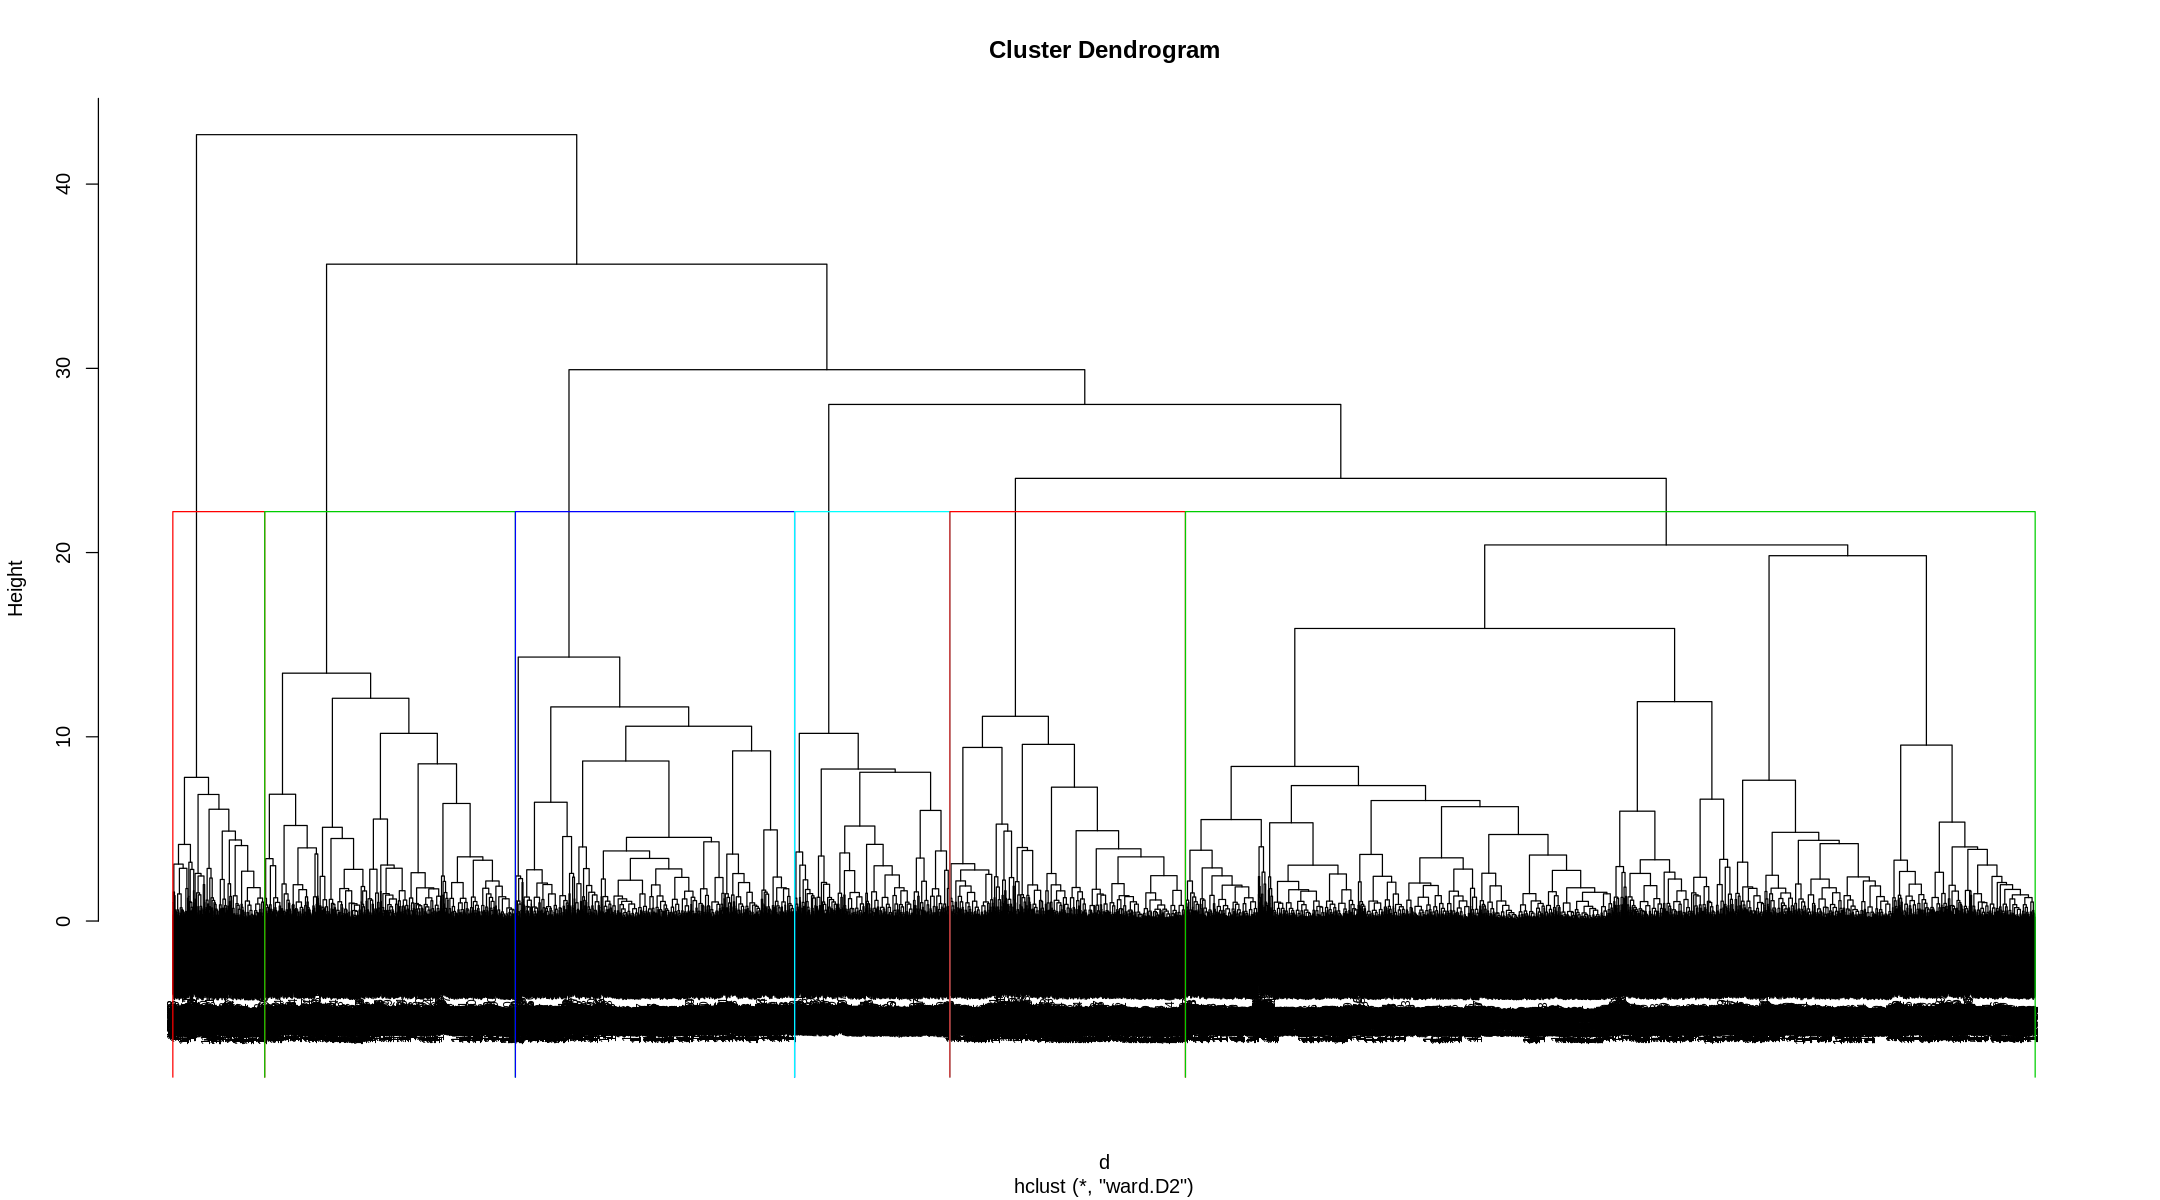

In [177]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(sol, method = "euclidean")
# Hierarchical clustering using Ward's method
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k =5)
# Visualize
plot(res.hc, cex = 0.6) 
# plot tree
rect.hclust(res.hc, k = 6, border = 2:5) # add rectangle

Why Hierarchical? 

It has the following advantages: 
1. It is easy to understand.
2. No prior information about the number of clusters required.

It has the following limitations:
1. Does not work well with large datasets.
2. Based on the type of distance matrix chosen for merging different algorithms can suffer with one or more of the following:
***  
    i) Sensitivity to noise and outliers

    ii) Breaking large clusters

    iii) Difficulty handling different sized clusters and convex shapes
  ***

## 7. Conclusion.

The Kmeans clustering provided good visuals of the different characteristis of different clusters. We later found out it was not the best model for the job by challenging the solution. Hierarchical was the best model although viewing the characteristics is challenging. 

## 8. Recommendations.

We would recommend:
1. Tuning the kmeans model to improve its performance. 
2. Finding a better way to visualize the hierarchical clusters.
3. More variables be availed. 
4. Add the clustree algorithm to better understand the behaviour of data as the clusters increase from 1 to n number of clusters.
5. Use of the features identified in PCA to further optimize the models.

## 9. Follow up questions.

Did we have the right data? **Yes we did.**
